## Business Case

We have an investor named Alexandra with the following characteristics: She is a conservative investor and wants to invest the money she saved in her school days received from her millionaire parent. She wants to set up an NGO to support people in Sub-Saharan Africa and expects that her investment should fetch adequate returns to fund this initiative. She doesn't want to get any support from outside for this project and wants to do it with her own funds. Hence, she expects a decent but steady flow of funds from her investments for a long time.

#### Task to perform:
We have to analyse the performance of 12 stocks and creating a portfolio of stocks based on the client’s requirements.

#### Objectives:

 - Identifying trends in relevant dimensions- in this case the Close price and     volume traded are considered.
 - Determining how these trends can be applied for the creation of portfolio.
 - Suggestive investment strategy for the client.
 - Predicting the future price of the stocks in the chosen portfolio.


## Importing the libraries

In [1]:

import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import datetime as dt # date time
import math
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme()
pd.set_option('display.max_columns', None)

# Importing MinMax Scaler

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

## Reading the dataset

In [2]:
# Creating dataframes from the csv files
HA_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Aviation\HA.csv')
ALK_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Aviation\ALK.csv',header=0)
AAL_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Aviation\AAL.csv',header=0)
GS_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Finance\GS.csv')
DB_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Finance\DB.csv')
CS_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Finance\CS.csv')
JNJ_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Healthcare_Pharma\JNJ.csv')
MRK_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Healthcare_Pharma\MRK.csv')
BHC_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Healthcare_Pharma\BHC.csv')
GOOG_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Technology\GOOG.csv')
AMZN_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Technology\AMZN.csv')
AAPL_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\Technology\AAPL.csv')
SP500_df = pd.read_csv(r'C:\Users\Pooja\Downloads\BA_Dataset (1)\S&P500.csv')


In [3]:
HA_df.head()

Date  Open  High   Low  Close  Adj Close     Volume
0  01-10-2010  6.02  6.05  5.88   5.96   5.742526   645400.0
1  04-10-2010  5.96  6.00  5.73   5.75   5.540189   618900.0
2  05-10-2010  5.82  5.93  5.77   5.85   5.636539   534800.0
3  06-10-2010  5.85  6.05  5.85   5.97   5.752162  2563900.0
4  07-10-2010  6.04  6.32  5.98   6.15   5.925593  1115200.0

In [4]:
ALK_df.head()

Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
2  05-10-2010  12.2600  12.2850  11.9450  12.2150  10.767396  2567200.0
3  06-10-2010  12.2200  12.3950  12.0875  12.1875  10.743157  1043600.0
4  07-10-2010  12.2775  12.3450  11.2150  11.6250  10.247319  7682400.0

In [5]:
AAL_df.head()

Date  Open  High   Low  Close  Adj Close   Volume
0  01-10-2010  9.29  9.39  9.21   9.29   8.758067  3603800
1  04-10-2010  9.24  9.48  9.05   9.12   8.597802  3856800
2  05-10-2010  9.27  9.35  9.15   9.23   8.701504  3896600
3  06-10-2010  9.27  9.40  9.15   9.23   8.701504  3230200
4  07-10-2010  9.30  9.31  9.07   9.24   8.710930  3877700

In [6]:
GS_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  04-01-2010  170.050003  174.250000  169.509995  173.080002  147.920776   
1  05-01-2010  173.000000  176.259995  172.570007  176.139999  150.535919   
2  06-01-2010  175.380005  175.380005  173.759995  174.259995  148.929138   
3  07-01-2010  174.320007  178.750000  173.949997  177.669998  151.843475   
4  08-01-2010  176.330002  177.429993  173.949997  174.309998  148.971909   

       Volume  
0   9135000.0  
1  11659400.0  
2   7381100.0  
3   8727400.0  
4   7268100.0

In [7]:
DB_df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  69.103050  70.162216  68.893127  69.875954  59.037861  469500.0
1  05-01-2010  71.412216  71.698471  70.610687  71.211830  60.166534  503300.0
2  06-01-2010  69.847328  70.543892  69.494278  69.980919  59.126545  495000.0
3  07-01-2010  70.133591  70.896950  69.809158  70.772903  59.795689  700100.0
4  08-01-2010  72.891220  73.416031  72.509544  73.330154  61.956295  763900.0

In [8]:
CS_df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
1  05-01-2010  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2  06-01-2010  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0
3  07-01-2010  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0
4  08-01-2010  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0

In [9]:
JNJ_df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  62.090000  62.250000  61.570000  61.750000  45.970119   
1  04-10-2010  61.540001  61.980000  61.299999  61.669998  45.910553   
2  05-10-2010  62.080002  62.939999  62.009998  62.799999  46.751797   
3  06-10-2010  62.889999  63.259998  62.500000  63.209999  47.057022   
4  07-10-2010  63.290001  63.500000  63.000000  63.220001  47.064480   

       Volume  
0   9773200.0  
1   8703600.0  
2  12439400.0  
3  11339800.0  
4   9826600.0

In [10]:
MRK_df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  36.759998  36.840000  36.349998  36.599998  26.052284   
1  04-10-2010  36.490002  36.750000  36.290001  36.520000  25.995331   
2  05-10-2010  36.860001  37.150002  36.700001  37.020000  26.351234   
3  06-10-2010  37.040001  37.220001  36.820000  37.009998  26.344130   
4  07-10-2010  37.349998  37.389999  36.630001  36.709999  26.130579   

       Volume  
0  11741900.0  
1   9234900.0  
2  10669200.0  
3   7541300.0  
4  13897800.0

In [11]:
BHC_df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  25.120001  25.879999  25.100000  25.750000  24.757708   
1  04-10-2010  25.750000  25.990000  25.590000  25.870001  24.873083   
2  05-10-2010  26.040001  26.330000  25.830000  26.299999  25.286512   
3  06-10-2010  26.150000  26.879999  26.049999  26.690001  25.661484   
4  07-10-2010  26.700001  26.910000  26.440001  26.600000  25.574951   

      Volume  
0  5778700.0  
1  4187200.0  
2  4610300.0  
3  4448900.0  
4  2453900.0

In [12]:
GOOG_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  264.010437  264.319275  260.523499  261.828613  261.828613   
1  04-10-2010  261.494843  263.138702  258.456238  260.199707  260.199707   
2  05-10-2010  263.203461  268.991760  262.291870  268.110046  268.110046   
3  06-10-2010  268.623138  268.966858  263.980530  266.177307  266.177307   
4  07-10-2010  267.103821  267.596985  263.582031  264.015411  264.015411   

      Volume  
0  4466600.0  
1  3895400.0  
2  7040400.0  
3  5545200.0  
4  4809400.0

In [13]:
AMZN_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
1  04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
2  05-10-2010  157.080002  161.210007  157.009995  160.869995  160.869995   
3  06-10-2010  160.600006  160.679993  154.600006  155.399994  155.399994   
4  07-10-2010  156.509995  157.399994  153.389999  156.270004  156.270004   

      Volume  
0  8683400.0  
1  5346500.0  
2  5620000.0  
3  6060800.0  
4  4622000.0

In [14]:
AAPL_df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

In [15]:
SP500_df.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

## Checking the dataset for missing values

In [16]:
# Checking the null values in the dataset

print('No missing data -->HA') if sum(HA_df.isnull().sum()) == 0 else (HA_df.isnull().sum())/len(HA_df)
print('No missing data -->ALK') if sum(ALK_df.isnull().sum()) == 0 else (ALK_df.isnull().sum())/len(ALK_df)
print('No missing data -->AAL') if sum(AAL_df.isnull().sum()) == 0 else (AAL_df.isnull().sum())/len(AAL_df)
print('No missing data -->GS') if sum(GS_df.isnull().sum()) == 0 else (GS_df.isnull().sum())/len(GS_df)
print('No missing data -->DB') if sum(DB_df.isnull().sum()) == 0 else (DB_df.isnull().sum())/len(DB_df)
print('No missing data -->Cs') if sum(CS_df.isnull().sum()) == 0 else (CS_df.isnull().sum())/len(CS_df)
print('No missing data -->JNJ') if sum(JNJ_df.isnull().sum()) == 0 else (JNJ_df.isnull().sum())/len(JNJ_df)
print('No missing data -->MRK') if sum(MRK_df.isnull().sum()) == 0 else (MRK_df.isnull().sum())/len(MRK_df)
print('No missing data -->BHC') if sum(BHC_df.isnull().sum()) == 0 else (BHC_df.isnull().sum())/len(BHC_df)
print('No missing data -->GOOG') if sum(GOOG_df.isnull().sum()) == 0 else (GOOG_df.isnull().sum())/len(GOOG_df)
print('No missing data -->AMZN') if sum(AMZN_df.isnull().sum()) == 0 else (AMZN_df.isnull().sum())/len(AMZN_df)
print('No missing data -->AAPL') if sum(AAPL_df.isnull().sum()) == 0 else (AAPL_df.isnull().sum())/len(AAPL_df)
print('No missing data -->SP500') if sum(SP500_df.isnull().sum()) == 0 else (SP500_df.isnull().sum())/len(SP500_df)

No missing data -->AAL
No missing data -->AAPL
No missing data -->SP500


 - No missing data found in the dataset. No need for missing value treatment.

In [17]:
# Checking the shape of all datasets
print('SHAPE OF AAL:',AAL_df.shape, '\nSHAPE OF ALK:',ALK_df.shape, '\nSHAPE OF HA:',HA_df.shape, '\nSHAPE OF CS:',CS_df.shape, '\nSHAPE OF DB:',DB_df.shape,'\nSHAPE OF GS:',GS_df.shape,'\nSHAPE OF BHC:',BHC_df.shape, '\nSHAPE OF JNJ:',JNJ_df.shape ,'\nSHAPE OF MRK:',MRK_df.shape,'\nSHAPE OF AAPL:',AAPL_df.shape,
      '\nSHAPE OF AMZN:',AMZN_df.shape,'\nSHAPE OF GOOG:',GOOG_df.shape,'\nSHAPE OF GOOG:',SP500_df.shape)


SHAPE OF AAL: (2517, 7) 
SHAPE OF ALK: (2524, 7) 
SHAPE OF HA: (2524, 7) 
SHAPE OF CS: (2712, 7) 
SHAPE OF DB: (2712, 7) 
SHAPE OF GS: (2712, 7) 
SHAPE OF BHC: (2525, 7) 
SHAPE OF JNJ: (2525, 7) 
SHAPE OF MRK: (2525, 7) 
SHAPE OF AAPL: (2517, 7) 
SHAPE OF AMZN: (2524, 7) 
SHAPE OF GOOG: (2524, 7) 
SHAPE OF GOOG: (2517, 7)


 - The datasets have different number of records
 - Also the stocks need to be analysed for the period of 1st October 2010 to 30th September 2020. Any records beyond this period needs to be dropped.
 - Hence, the primary key of the datasets need to be converted to datetime format

In [18]:
#Converting the primary key of each file to date time format

HA_df.Date=pd.to_datetime(HA_df.Date,format='%d-%m-%Y')
ALK_df.Date=pd.to_datetime(ALK_df.Date,format='%d-%m-%Y')
AAL_df.Date=pd.to_datetime(AAL_df.Date,format='%d-%m-%Y')
GS_df.Date=pd.to_datetime(GS_df.Date,format='%d-%m-%Y')
DB_df.Date=pd.to_datetime(DB_df.Date,format='%d-%m-%Y')
CS_df.Date=pd.to_datetime(CS_df.Date,format='%d-%m-%Y')
JNJ_df.Date=pd.to_datetime(JNJ_df.Date,format='%d-%m-%Y')
MRK_df.Date=pd.to_datetime(MRK_df.Date,format='%d-%m-%Y')
BHC_df.Date=pd.to_datetime(BHC_df.Date,format='%d-%m-%Y')
GOOG_df.Date=pd.to_datetime(GOOG_df.Date,format='%d-%m-%Y')
AMZN_df.Date=pd.to_datetime(AMZN_df.Date,format='%d-%m-%Y')
AAPL_df.Date=pd.to_datetime(AAPL_df.Date,format='%d-%m-%Y')
SP500_df.Date=pd.to_datetime(SP500_df.Date,format='%d-%m-%Y')

In [19]:
# Extracting data ony from 1st October to 30th September

HA_df= HA_df[HA_df.Date.between ('2010-10-01', '2020--09-30')]
ALK_df= ALK_df[ALK_df.Date.between ('2010-10-01', '2020-09-30')]
AAL_df= AAL_df[AAL_df.Date.between ('2010-10-01', '2020-09-30') ]
GS_df= GS_df[GS_df.Date.between ('2010-10-01', '2020--09-30')]
DB_df= DB_df[DB_df.Date.between ('2010-10-01', '2020--09-30')]
CS_df= CS_df[CS_df.Date.between ('2010-10-01', '2020--09-30')]
JNJ_df= JNJ_df[JNJ_df.Date.between ('2010-10-01', '2020--09-30')]
MRK_df= MRK_df[MRK_df.Date.between ('2010-10-01', '2020--09-30')]
BHC_df= BHC_df[BHC_df.Date.between ('2010-10-01', '2020--09-30')]
GOOG_df= GOOG_df[GOOG_df.Date.between ('2010-10-01', '2020--09-30')]
AMZN_df= AMZN_df[AMZN_df.Date.between ('2010-10-01', '2020--09-30')]
AAPL_df= AAPL_df[AAPL_df.Date.between ('2010-10-01', '2020--09-30')]
SP500_df= SP500_df[SP500_df.Date.between ('2010-10-01', '2020--09-30')]

In [20]:

# Checking the shape of all datasets
print('SHAPE OF AAL:',AAL_df.shape, '\nSHAPE OF ALK:',ALK_df.shape, '\nSHAPE OF HA:',HA_df.shape, '\nSHAPE OF CS:',CS_df.shape, '\nSHAPE OF DB:',DB_df.shape,'\nSHAPE OF GS:',GS_df.shape,'\nSHAPE OF BHC:',BHC_df.shape, '\nSHAPE OF JNJ:',JNJ_df.shape ,'\nSHAPE OF MRK:',MRK_df.shape,'\nSHAPE OF AAPL:',AAPL_df.shape,
      '\nSHAPE OF AMZN:',AMZN_df.shape,'\nSHAPE OF GOOG:',GOOG_df.shape,'\nSHAPE OF GOOG:',SP500_df.shape)


SHAPE OF AAL: (2517, 7) 
SHAPE OF ALK: (2517, 7) 
SHAPE OF HA: (2517, 7) 
SHAPE OF CS: (2517, 7) 
SHAPE OF DB: (2517, 7) 
SHAPE OF GS: (2517, 7) 
SHAPE OF BHC: (2517, 7) 
SHAPE OF JNJ: (2517, 7) 
SHAPE OF MRK: (2517, 7) 
SHAPE OF AAPL: (2517, 7) 
SHAPE OF AMZN: (2517, 7) 
SHAPE OF GOOG: (2517, 7) 
SHAPE OF GOOG: (2517, 7)


Create merged data frame for all stocks
 - For further analysis all the stocks need to be merged into one data frame using date as primary key.
 - Each record should show the company name and industry in the merged data set. 

In [21]:
#For showing all outputs in one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
# Setting Date as index

AAL_df=AAL_df.set_index('Date')
ALK_df=ALK_df.set_index('Date')
HA_df=HA_df.set_index('Date')
CS_df=CS_df.set_index('Date')
DB_df=DB_df.set_index('Date')
GS_df=GS_df.set_index('Date')
BHC_df=BHC_df.set_index('Date')
JNJ_df=JNJ_df.set_index('Date')
MRK_df=MRK_df.set_index('Date')
AAPL_df=AAPL_df.set_index('Date')
AMZN_df=AMZN_df.set_index('Date')
GOOG_df=GOOG_df.set_index('Date')
SP500_df=SP500_df.set_index('Date')

In [23]:
# Adding Company name and industry for easy identification
AAL_df['Company']='American'
ALK_df['Company']='Alaska'
HA_df['Company']='Hawa'
CS_df['Company']='CS'
DB_df['Company']='Deutsche'
GS_df['Company']='Goldman'
JNJ_df['Company']='J&J'
MRK_df['Company']='Merck'
BHC_df['Company']='Bausch'
AAPL_df['Company']='Apple'
AMZN_df['Company']='Amazon'
GOOG_df['Company']='Google'
SP500_df['Company']='SP500'

AAL_df['Industry']='Aviation'
ALK_df['Industry']='Aviation'
HA_df['Industry']='Aviation'
CS_df['Industry']='Finance'
DB_df['Industry']='Finance'
GS_df['Industry']='Finance'
JNJ_df['Industry']='Healthcare'
MRK_df['Industry']='Healthcare'
BHC_df['Industry']='Healthcare'
AAPL_df['Industry']='Technology'
AMZN_df['Industry']='Technology'
GOOG_df['Industry']='Technology'
SP500_df['Industry']= 'Index'

In [24]:
# Testing a sample dataframe after the changes
SP500_df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-10-01  1143.489990  1150.300049  1139.420044  1146.239990  1146.239990   
2010-10-04  1144.959961  1148.160034  1131.869995  1137.030029  1137.030029   
2010-10-05  1140.680054  1162.760010  1140.680054  1160.750000  1160.750000   
2010-10-06  1159.810059  1162.329956  1154.849976  1159.969971  1159.969971   
2010-10-07  1161.569946  1163.869995  1151.410034  1158.060059  1158.060059   

                Volume Company Industry  
Date                                     
2010-10-01  4298910000   SP500    Index  
2010-10-04  3604110000   SP500    Index  
2010-10-05  4068840000   SP500    Index  
2010-10-06  4073160000   SP500    Index  
2010-10-07  3910550000   SP500    Index

In [25]:
# Creating merged dataframe
Tickers = [AAL_df,ALK_df,HA_df,CS_df,DB_df,GS_df,JNJ_df,MRK_df,BHC_df,AAPL_df,AMZN_df,GOOG_df,SP500_df]
merged_df=pd.concat(Tickers)

In [26]:
# Checking the Shape of dataframe
merged_df.shape

(32721, 8)

In [27]:
len(GOOG_df)*13

32721

In [28]:
# Checking the dataframe
merged_df.head()

Open  High   Low  Close  Adj Close     Volume   Company  Industry
Date                                                                         
2010-10-01  9.29  9.39  9.21   9.29   8.758067  3603800.0  American  Aviation
2010-10-04  9.24  9.48  9.05   9.12   8.597802  3856800.0  American  Aviation
2010-10-05  9.27  9.35  9.15   9.23   8.701504  3896600.0  American  Aviation
2010-10-06  9.27  9.40  9.15   9.23   8.701504  3230200.0  American  Aviation
2010-10-07  9.30  9.31  9.07   9.24   8.710930  3877700.0  American  Aviation

In [29]:
# creating new Column with combine Company and Industry
merged_df['Name']=merged_df['Industry']+"-"+merged_df['Company']

In [30]:
# Check the dataframe
merged_df.head()

Open  High   Low  Close  Adj Close     Volume   Company  Industry  \
Date                                                                            
2010-10-01  9.29  9.39  9.21   9.29   8.758067  3603800.0  American  Aviation   
2010-10-04  9.24  9.48  9.05   9.12   8.597802  3856800.0  American  Aviation   
2010-10-05  9.27  9.35  9.15   9.23   8.701504  3896600.0  American  Aviation   
2010-10-06  9.27  9.40  9.15   9.23   8.701504  3230200.0  American  Aviation   
2010-10-07  9.30  9.31  9.07   9.24   8.710930  3877700.0  American  Aviation   

                         Name  
Date                           
2010-10-01  Aviation-American  
2010-10-04  Aviation-American  
2010-10-05  Aviation-American  
2010-10-06  Aviation-American  
2010-10-07  Aviation-American

In [31]:
# putting only necessary columns in the merged dataframe
# we will consider only Close prices of the stocks
merged_df = merged_df[['Close','Volume','Name']]

In [32]:
merged_df.head()

Close     Volume               Name
Date                                           
2010-10-01   9.29  3603800.0  Aviation-American
2010-10-04   9.12  3856800.0  Aviation-American
2010-10-05   9.23  3896600.0  Aviation-American
2010-10-06   9.23  3230200.0  Aviation-American
2010-10-07   9.24  3877700.0  Aviation-American

In [33]:
# Exporting the merged dataframe into a CSV file
merged_df.to_csv('./Stocks.csv')

#### Data Exploration
 - Creating dataframes for Price and Volume

In [34]:
# Creating a dataframe of price for each Segment
stock_prices=merged_df.pivot_table(index='Date',values='Close',columns='Name').reset_index('Date')

In [35]:
# Creating a dataframe for price from the merged dataframe
stock_prices = pd.pivot_table(merged_df,index="Date",columns="Name", values='Close') \
       .reset_index().rename_axis(None, axis=1)
stock_prices.head()

Date  Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
0 2010-10-01          12.4475               9.29           5.96   42.226563   
1 2010-10-04          12.1425               9.12           5.75   41.914063   
2 2010-10-05          12.2150               9.23           5.85   43.154297   
3 2010-10-06          12.1875               9.23           5.97   43.437500   
4 2010-10-07          11.6250               9.24           6.15   43.671875   

   Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
0         52.595421       147.699997          25.750000       61.750000   
1         51.755726       146.570007          25.870001       61.669998   
2         53.950382       149.570007          26.299999       62.799999   
3         54.608780       150.839996          26.690001       63.209999   
4         54.036259       151.110001          26.600000       63.220001   

   Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
0         36.599998  1146.239990         153.710007         10.090000   
1         36.520000  1137.030029         155.389999          9.951428   
2         37.020000  1160.750000         160.869995         10.319285   
3         37.009998  1159.969971         155.399994         10.328215   
4         36.709999  1158.060059         156.270004         10.329286   

   Technology-Google  
0         261.828613  
1         260.199707  
2         268.110046  
3         266.177307  
4         264.015411

In [36]:
# setting date as index
stock_prices=stock_prices.set_index('Date')

In [37]:
stock_prices.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

In [38]:
stock_prices.shape

(2517, 13)

In [39]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aviation-Alaska    2517 non-null   float64
 1   Aviation-American  2517 non-null   float64
 2   Aviation-Hawa      2517 non-null   float64
 3   Finance-CS         2517 non-null   float64
 4   Finance-Deutsche   2517 non-null   float64
 5   Finance-Goldman    2517 non-null   float64
 6   Healthcare-Bausch  2517 non-null   float64
 7   Healthcare-J&J     2517 non-null   float64
 8   Healthcare-Merck   2517 non-null   float64
 9   Index-SP500        2517 non-null   float64
 10  Technology-Amazon  2517 non-null   float64
 11  Technology-Apple   2517 non-null   float64
 12  Technology-Google  2517 non-null   float64
dtypes: float64(13)
memory usage: 275.3 KB



 - There is no need for missing value treatment as there is no null values noticed in the 'Closing Price' information of any of the given stock.

In [40]:
# Creating a dataframe of Volume of stock for each Segment
Stock_volume = pd.pivot_table(merged_df,index="Date",columns="Name", values='Volume') \
       .reset_index().rename_axis(None, axis=1)
Stock_volume.head()

Date  Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
0 2010-10-01        1663600.0          3603800.0       645400.0   1814900.0   
1 2010-10-04        1512400.0          3856800.0       618900.0   1085600.0   
2 2010-10-05        2567200.0          3896600.0       534800.0   1025300.0   
3 2010-10-06        1043600.0          3230200.0      2563900.0    871300.0   
4 2010-10-07        7682400.0          3877700.0      1115200.0   1377000.0   

   Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
0         2010600.0        7439800.0          5778700.0       9773200.0   
1         1245600.0        5866700.0          4187200.0       8703600.0   
2         2270900.0        8724700.0          4610300.0      12439400.0   
3         1887400.0        6330600.0          4448900.0      11339800.0   
4         1191000.0        4471500.0          2453900.0       9826600.0   

   Healthcare-Merck   Index-SP500  Technology-Amazon  Technology-Apple  \
0        11741900.0  4.298910e+09          8683400.0       448142800.0   
1         9234900.0  3.604110e+09          5346500.0       435302000.0   
2        10669200.0  4.068840e+09          5620000.0       501967200.0   
3         7541300.0  4.073160e+09          6060800.0       670868800.0   
4        13897800.0  3.910550e+09          4622000.0       408399600.0   

   Technology-Google  
0          4466600.0  
1          3895400.0  
2          7040400.0  
3          5545200.0  
4          4809400.0

In [41]:
# prices = prices.drop('Segment', axis=1, inplace=True)
Stock_volume=Stock_volume.set_index('Date')

In [42]:
# Explore the shape of Volume dataframe
Stock_volume.shape

(2517, 13)

In [43]:
# Check for missing values
Stock_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aviation-Alaska    2517 non-null   float64
 1   Aviation-American  2517 non-null   float64
 2   Aviation-Hawa      2517 non-null   float64
 3   Finance-CS         2517 non-null   float64
 4   Finance-Deutsche   2517 non-null   float64
 5   Finance-Goldman    2517 non-null   float64
 6   Healthcare-Bausch  2517 non-null   float64
 7   Healthcare-J&J     2517 non-null   float64
 8   Healthcare-Merck   2517 non-null   float64
 9   Index-SP500        2517 non-null   float64
 10  Technology-Amazon  2517 non-null   float64
 11  Technology-Apple   2517 non-null   float64
 12  Technology-Google  2517 non-null   float64
dtypes: float64(13)
memory usage: 275.3 KB


- There is no need for missing value treatment as there are no null values noticed in the 'Volume' information of any of the given stock.
 - As the data preparation is complete, now the dataset is ready for further exploration and analysis.

### Exploratory Data Analysis (EDA)
#### Steps include

- Exploring the distribution and checking for outliers.
- To see the distribution patter of price we have to do Boxplot.
- To plot Histogram to inspect variation in stock volume to understand volatility.
- We have to show Correlation between prices and volumes among the stocks.
- Price-Volume pattern of stocks over the period using line graphs.
- Comparison of stock-price among the industry and with the index using normalized values.

#### Exploring distribution and checking for outliers

In [44]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
stock_prices.describe(percentiles=[.25, .5, .75, .90, .95, .99]).round(2)

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
count          2517.00            2517.00        2517.00     2517.00   
mean             50.03              29.40          22.87       21.50   
std              24.19              15.21          15.48        8.99   
min              11.62               4.00           3.78        6.67   
25%              26.78              13.01           7.03       13.74   
50%              58.54              32.52          21.91       19.64   
75%              67.26              42.20          36.90       27.75   
90%              79.97              48.52          45.74       31.69   
95%              87.25              51.20          49.17       40.62   
99%              95.12              54.31          56.23       44.06   
max             100.24              58.47          60.30       46.51   

       Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
count           2517.00          2517.00            2517.00         2517.00   
mean              27.30           179.60              61.88          105.28   
std               15.41            42.41              57.17           28.17   
min                5.48            87.70               8.51           57.66   
25%               13.47           154.99              22.17           81.93   
50%               28.37           177.23              38.76          104.04   
75%               41.05           211.58              90.27          130.98   
90%               47.34           237.09             139.43          140.77   
95%               54.69           245.80             202.71          146.26   
99%               59.19           262.87             239.43          150.51   
max               62.62           273.38             262.52          155.51   

       Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
count           2517.00      2517.00            2517.00           2517.00   
mean              57.16      2111.39             854.64             33.45   
std               15.16       612.23             745.20             20.63   
min               29.81      1099.23             153.03              9.95   
25%               45.73      1562.17             266.49             18.96   
50%               57.18      2071.22             533.75             27.59   
75%               64.09      2656.30            1500.00             42.96   
90%               81.37      2932.95            1883.97             56.76   
95%               84.34      3128.57            2137.87             77.38   
99%               89.09      3373.17            3162.04            112.98   
max               92.04      3580.84            3531.45            134.18   

       Technology-Google  
count            2517.00  
mean              730.43  
std               364.69  
min               236.55  
25%               403.64  
50%               651.79  
75%              1055.81  
90%              1229.46  
95%              1393.51  
99%              1521.84  
max              1728.28

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [46]:
list(stock_prices.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

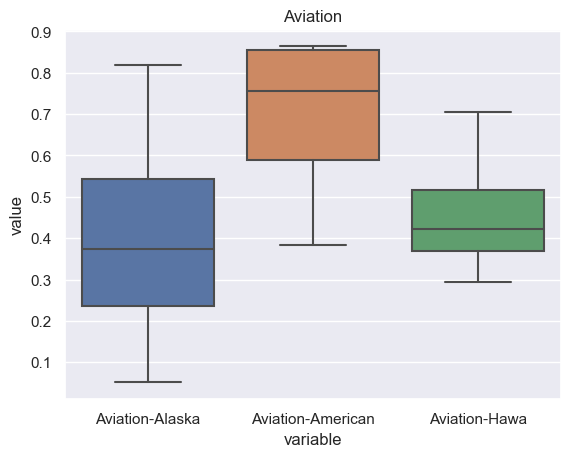

In [47]:
stock_prices_AVI = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Aviation-Alaska','Aviation-American','Aviation-Hawa'])
sns.boxplot(x="variable", y="value", data=pd.melt(stock_prices_AVI))
plt.title("Aviation")
plt.show()


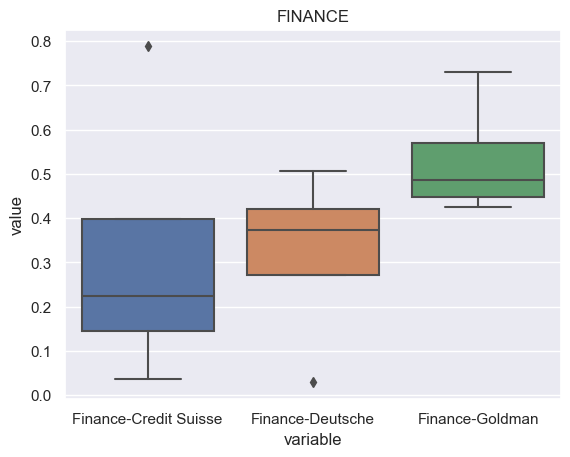

In [48]:
stock_prices_FIN = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Finance-Credit Suisse','Finance-Deutsche','Finance-Goldman'])
sns.boxplot(x="variable", y="value", data=pd.melt(stock_prices_FIN))
plt.title("FINANCE")
plt.show()


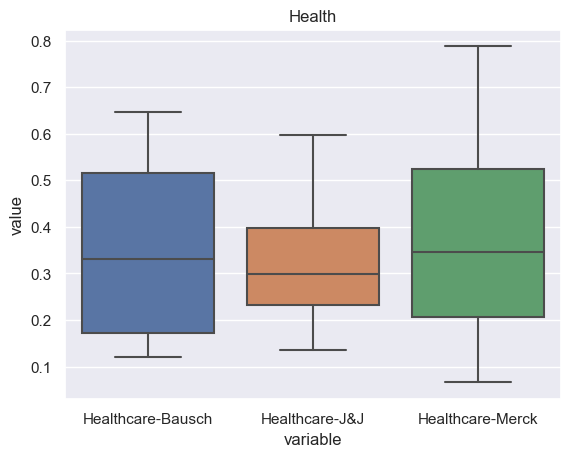

In [49]:
stock_prices_Health= pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Healthcare-Bausch','Healthcare-J&J','Healthcare-Merck'])
sns.boxplot(x="variable", y="value", data=pd.melt(stock_prices_Health))
plt.title("Health")
plt.show()


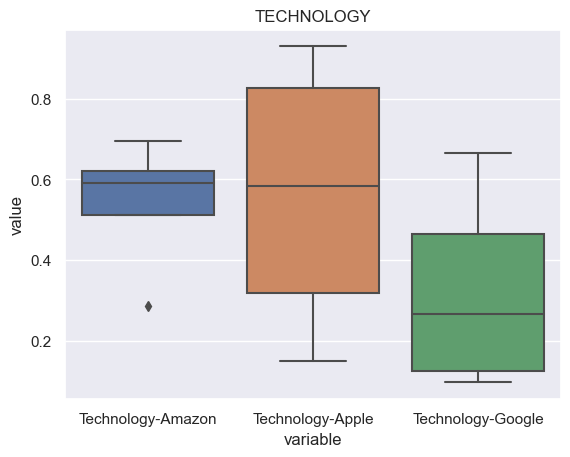

In [50]:
stock_prices_Tech= pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Technology-Amazon','Technology-Apple','Technology-Google'])
sns.boxplot(x="variable", y="value", data=pd.melt(stock_prices_Tech))
plt.title("TECHNOLOGY")
plt.show()


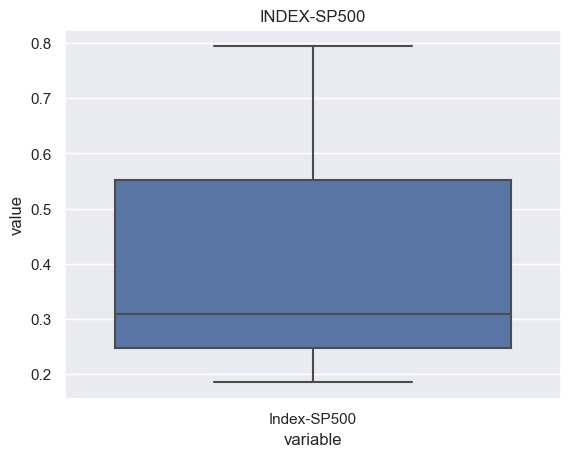

In [51]:
stock_prices_SP500 = pd.DataFrame(data = np.random.random(size=(3,1)), columns = ['Index-SP500'])
sns.boxplot(x="variable", y="value", data=pd.melt(stock_prices_SP500))
plt.title("INDEX-SP500")
plt.show()


- Aviation: Alaska and Hawaiian are normally distributed while American airlines the most of the frequencies lie below the median inplies the mean is lesser than the median.
- Finance: Credit Suisse and Deutsche are normally distributed while Goldman shows a very slight skewness towards the left.
- Healthcare: Bausch and J&J are almost normally distributed but Merck shows higher distribution lower than median.
- Technology:
    - Google – normal distribution. 
    - Apple and Amazon are left skewed. 
    - Apple shows outliers in the first quartile.
- SP500: Index prices are distributed in such a way that the median is higher than mean with implying more extreme prices in the bottom 50% of the distribution.

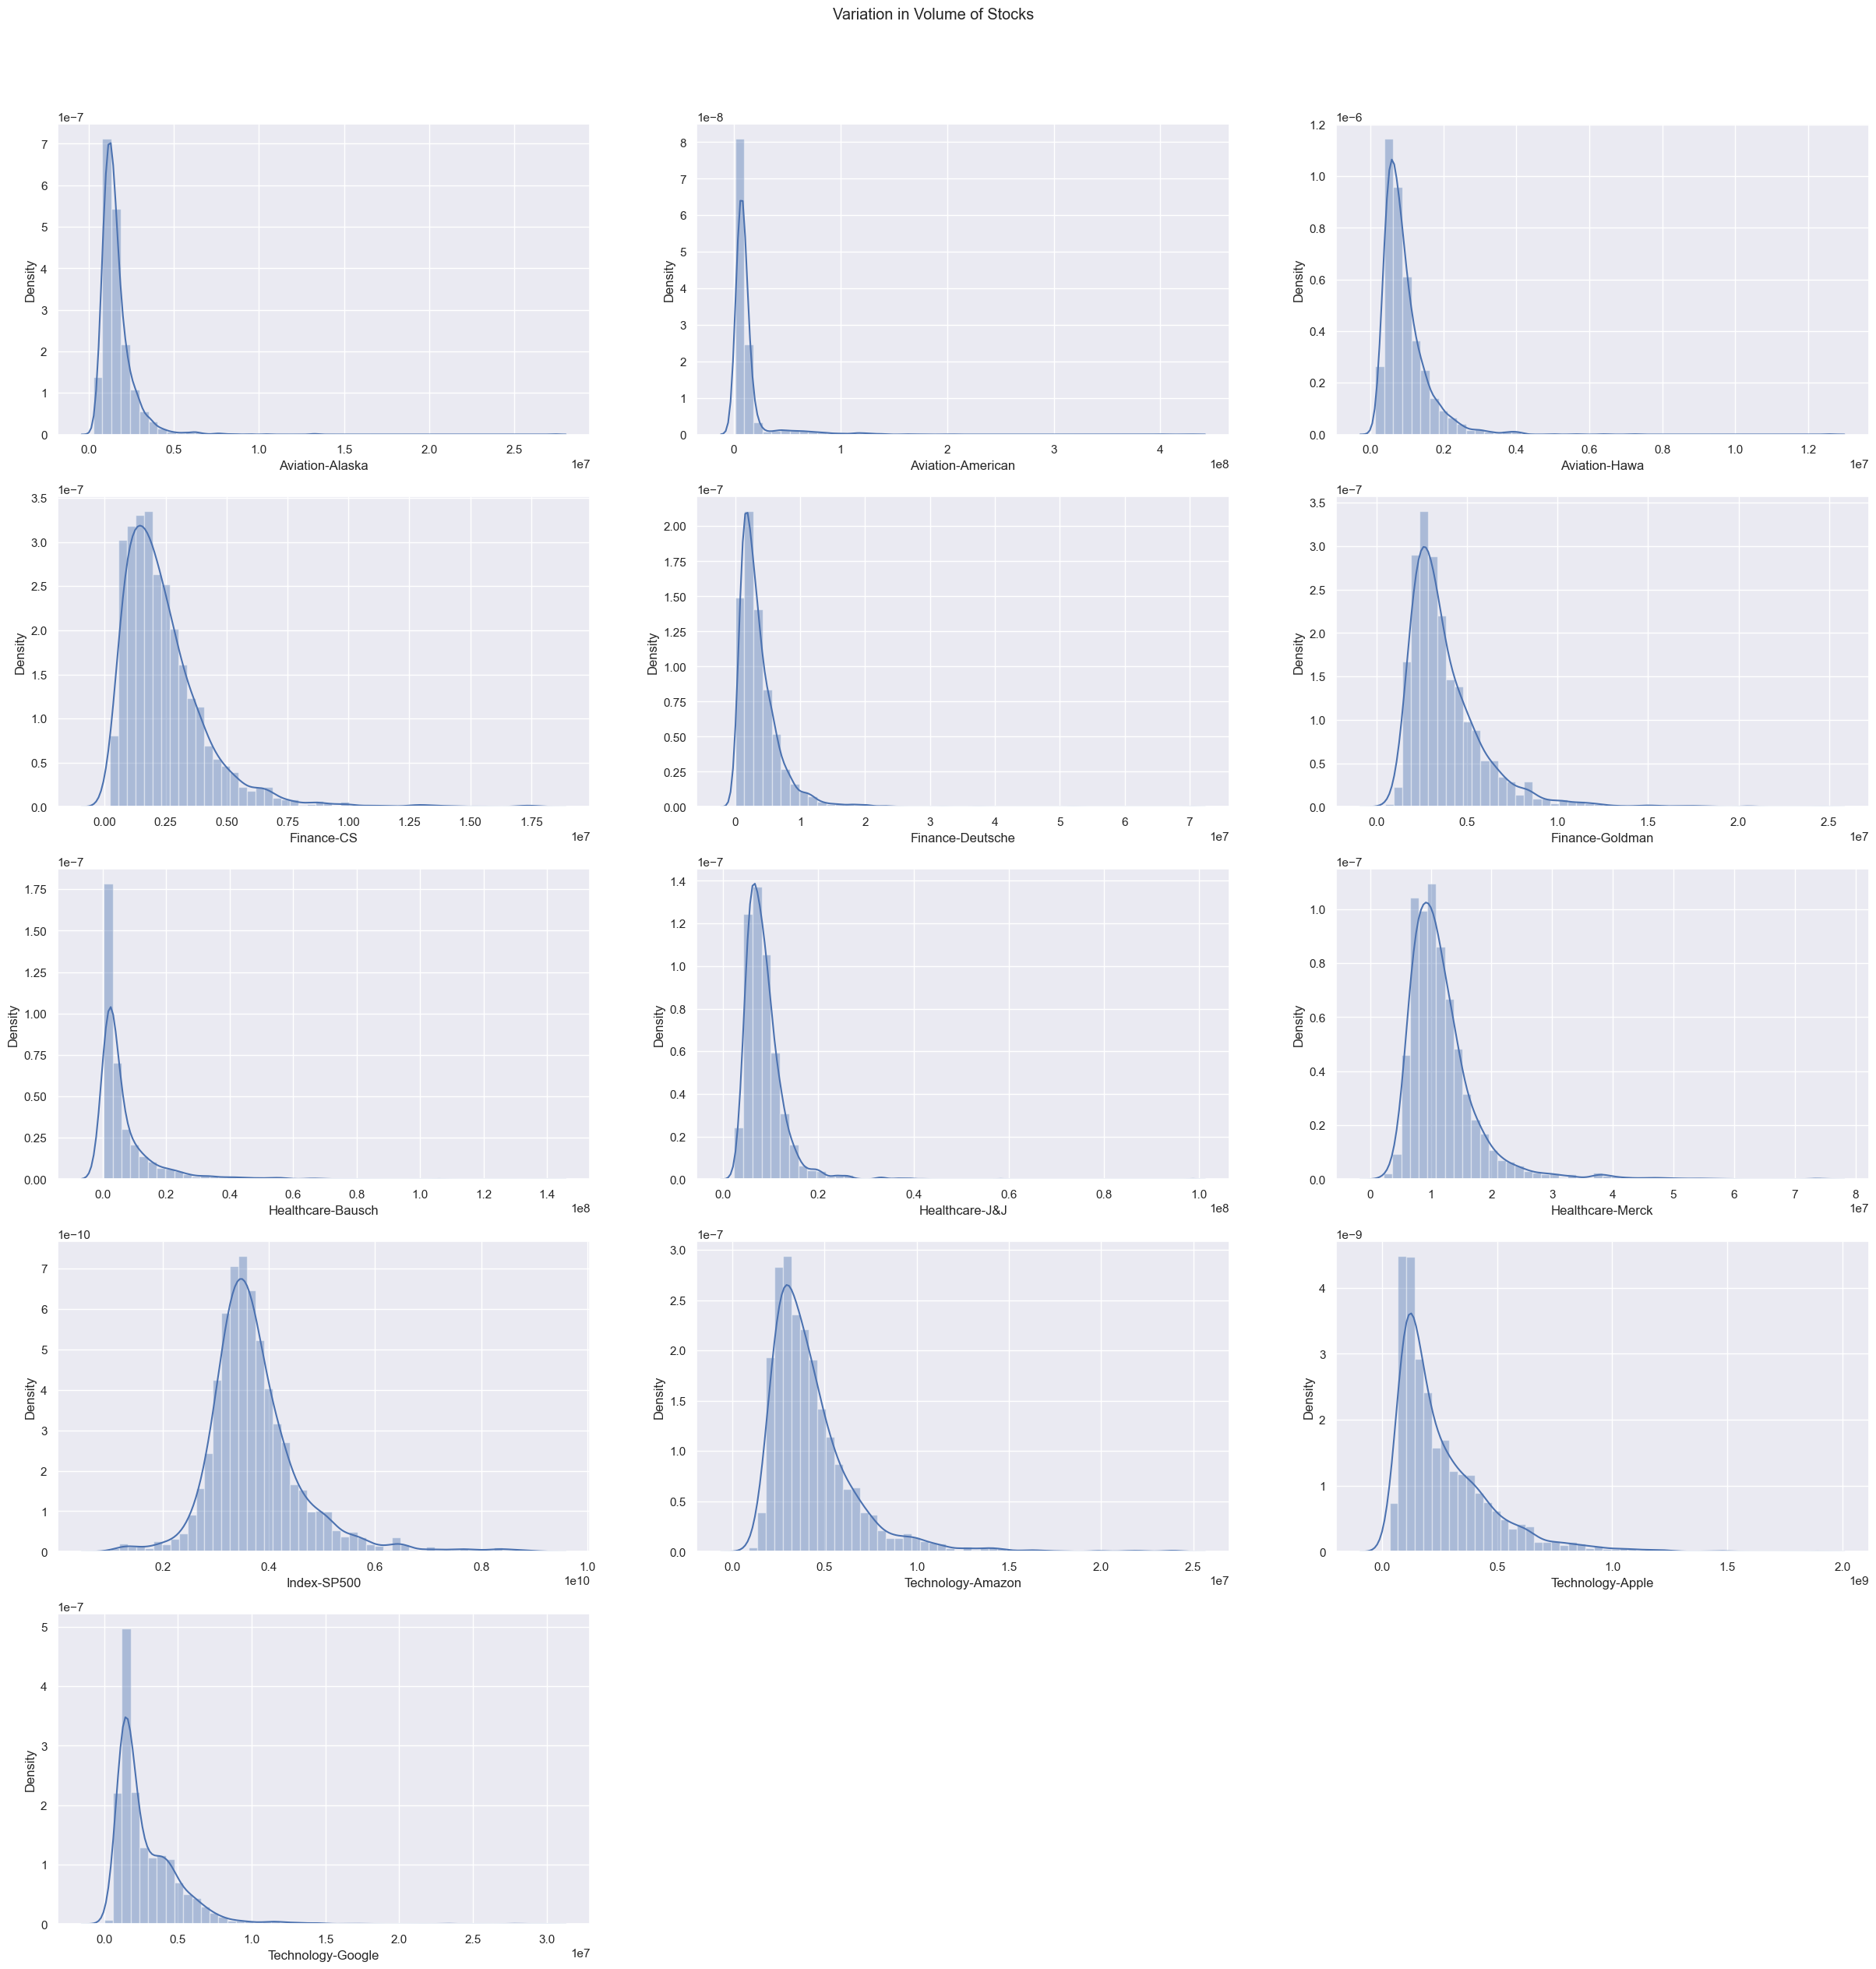

In [52]:
#Plotting the histogram plots of the Volumes of Stocks
plt.figure(figsize = (30,30))
plt.tight_layout()
feature = Stock_volume.columns
for i in enumerate(feature):
    plt.subplot(5,3, i[0]+1)
    sns.distplot(Stock_volume[i[1]],hist=True)
    
plt.suptitle("Variation in Volume of Stocks",y=0.93)
plt.show()

The above plot gives the ditribution of Volume around the mean. 
- Higher the standard deviation, more volatile is the stock. 
- Stocks with higher Standard deviation will cover more area in the above graph.
- Hence, volatility can be seen in CS_Fin, GS-Fin, Merck-HC, AAPL, AMZN and GOOG.

## Finding the Correlation of volume and price of stocks

This is done to see which stocks are highly correlated with the index in terms of price and volume traded.

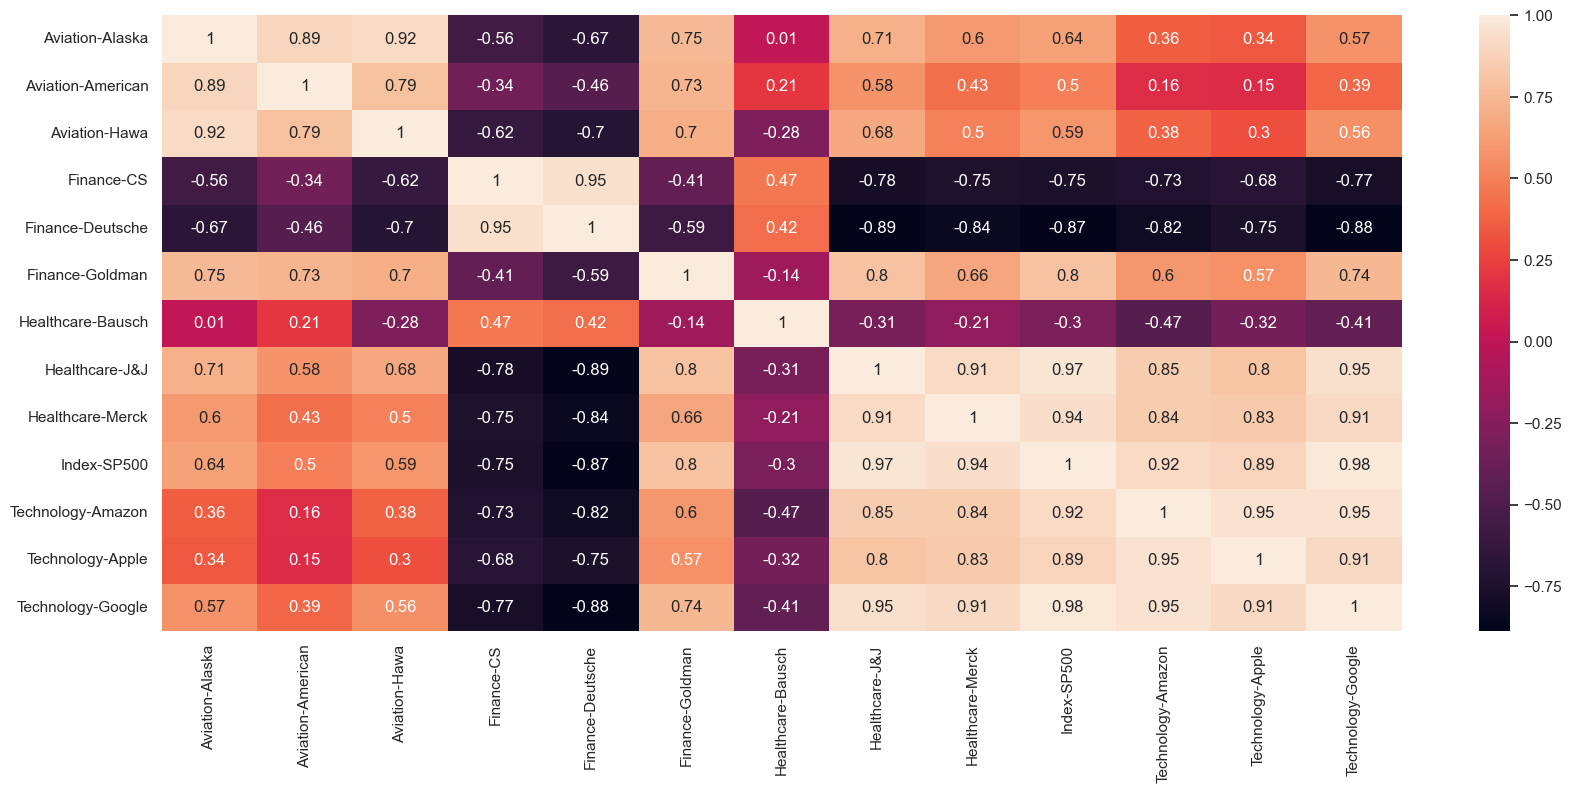

In [53]:
#Plotting the correlation of Stock Prices
plt.figure(figsize = (20,8))
sns.heatmap(stock_prices.corr(),annot = True)
plt.show()

Inspecting the correlation of each stock, it is found that:

- Stocks with Strong Positive Correlation (0.6 to 1): Apple, Amazon, Google, Goldman Sachs, J&J, Merck & Co & Alaska

- Stocks with Weak Positive Correlation (0 to 0.6): American Airlines, Hawaiian Holdings.

- Stocks with Negative Correlation (0 to -1): Bausch Health, Credit Suisse, Deutsche Bank.

- Ideally, the stocks that have negative correlation with the Index (S&P 500) should be avoided in the portfolio since they may prove to be very risky.

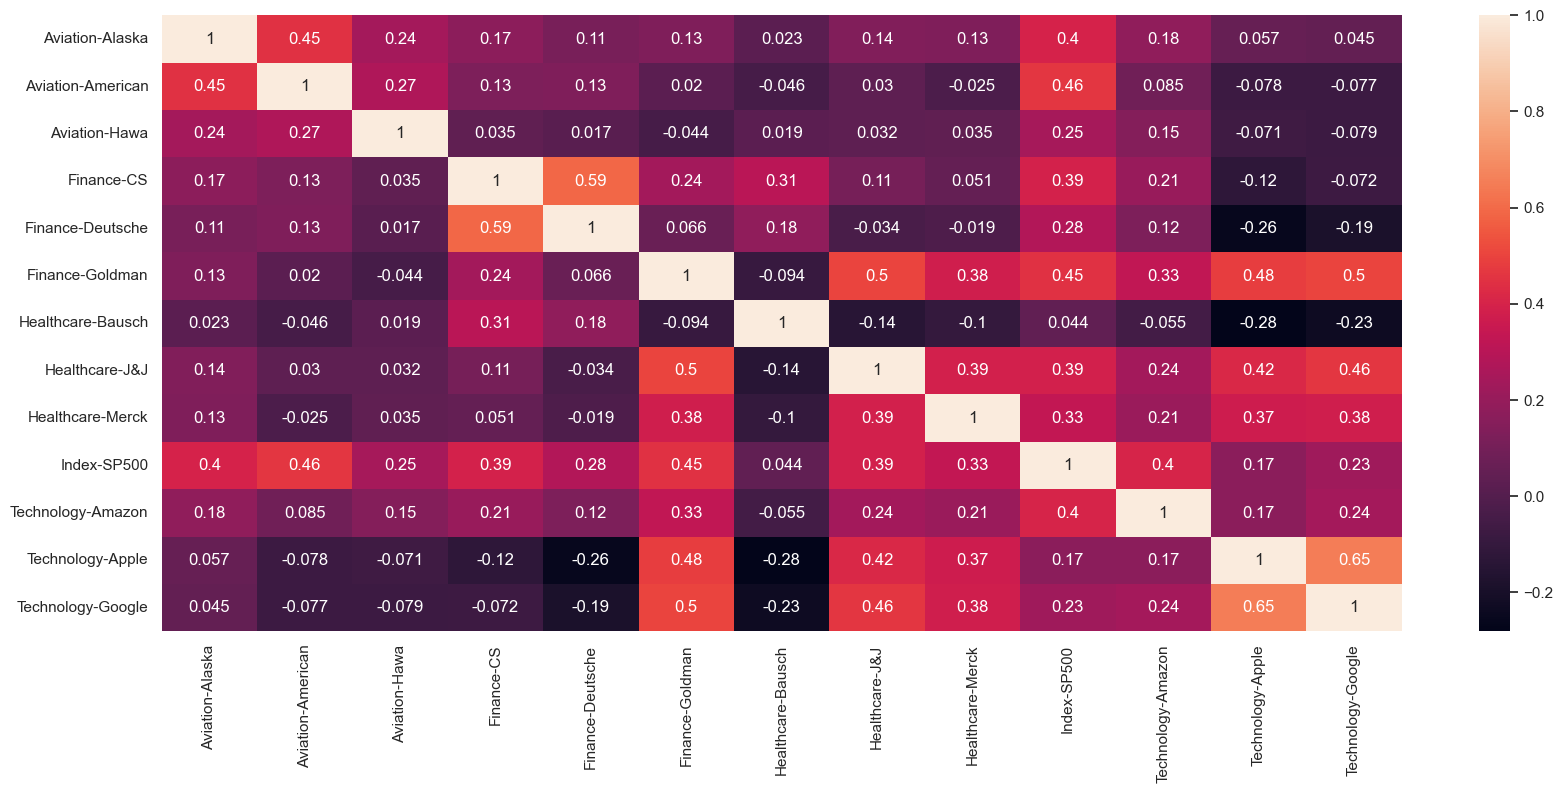

In [54]:
#Plotting the correlation of Stock Volume
plt.figure(figsize = (20,8))
sns.heatmap(Stock_volume.corr(),annot = True)
plt.show()


- All the stocks have a positve correlation with S&P500. However, the correlation is of a weak positive correlation with the highest being 0.46 with American Air

#### Price-Volume pattern of stocks over the period using line graphs
 - To inspect if the movement of stock prices and volume are in sink with the index.

##### Exploring the movement in Volume of stocks traded

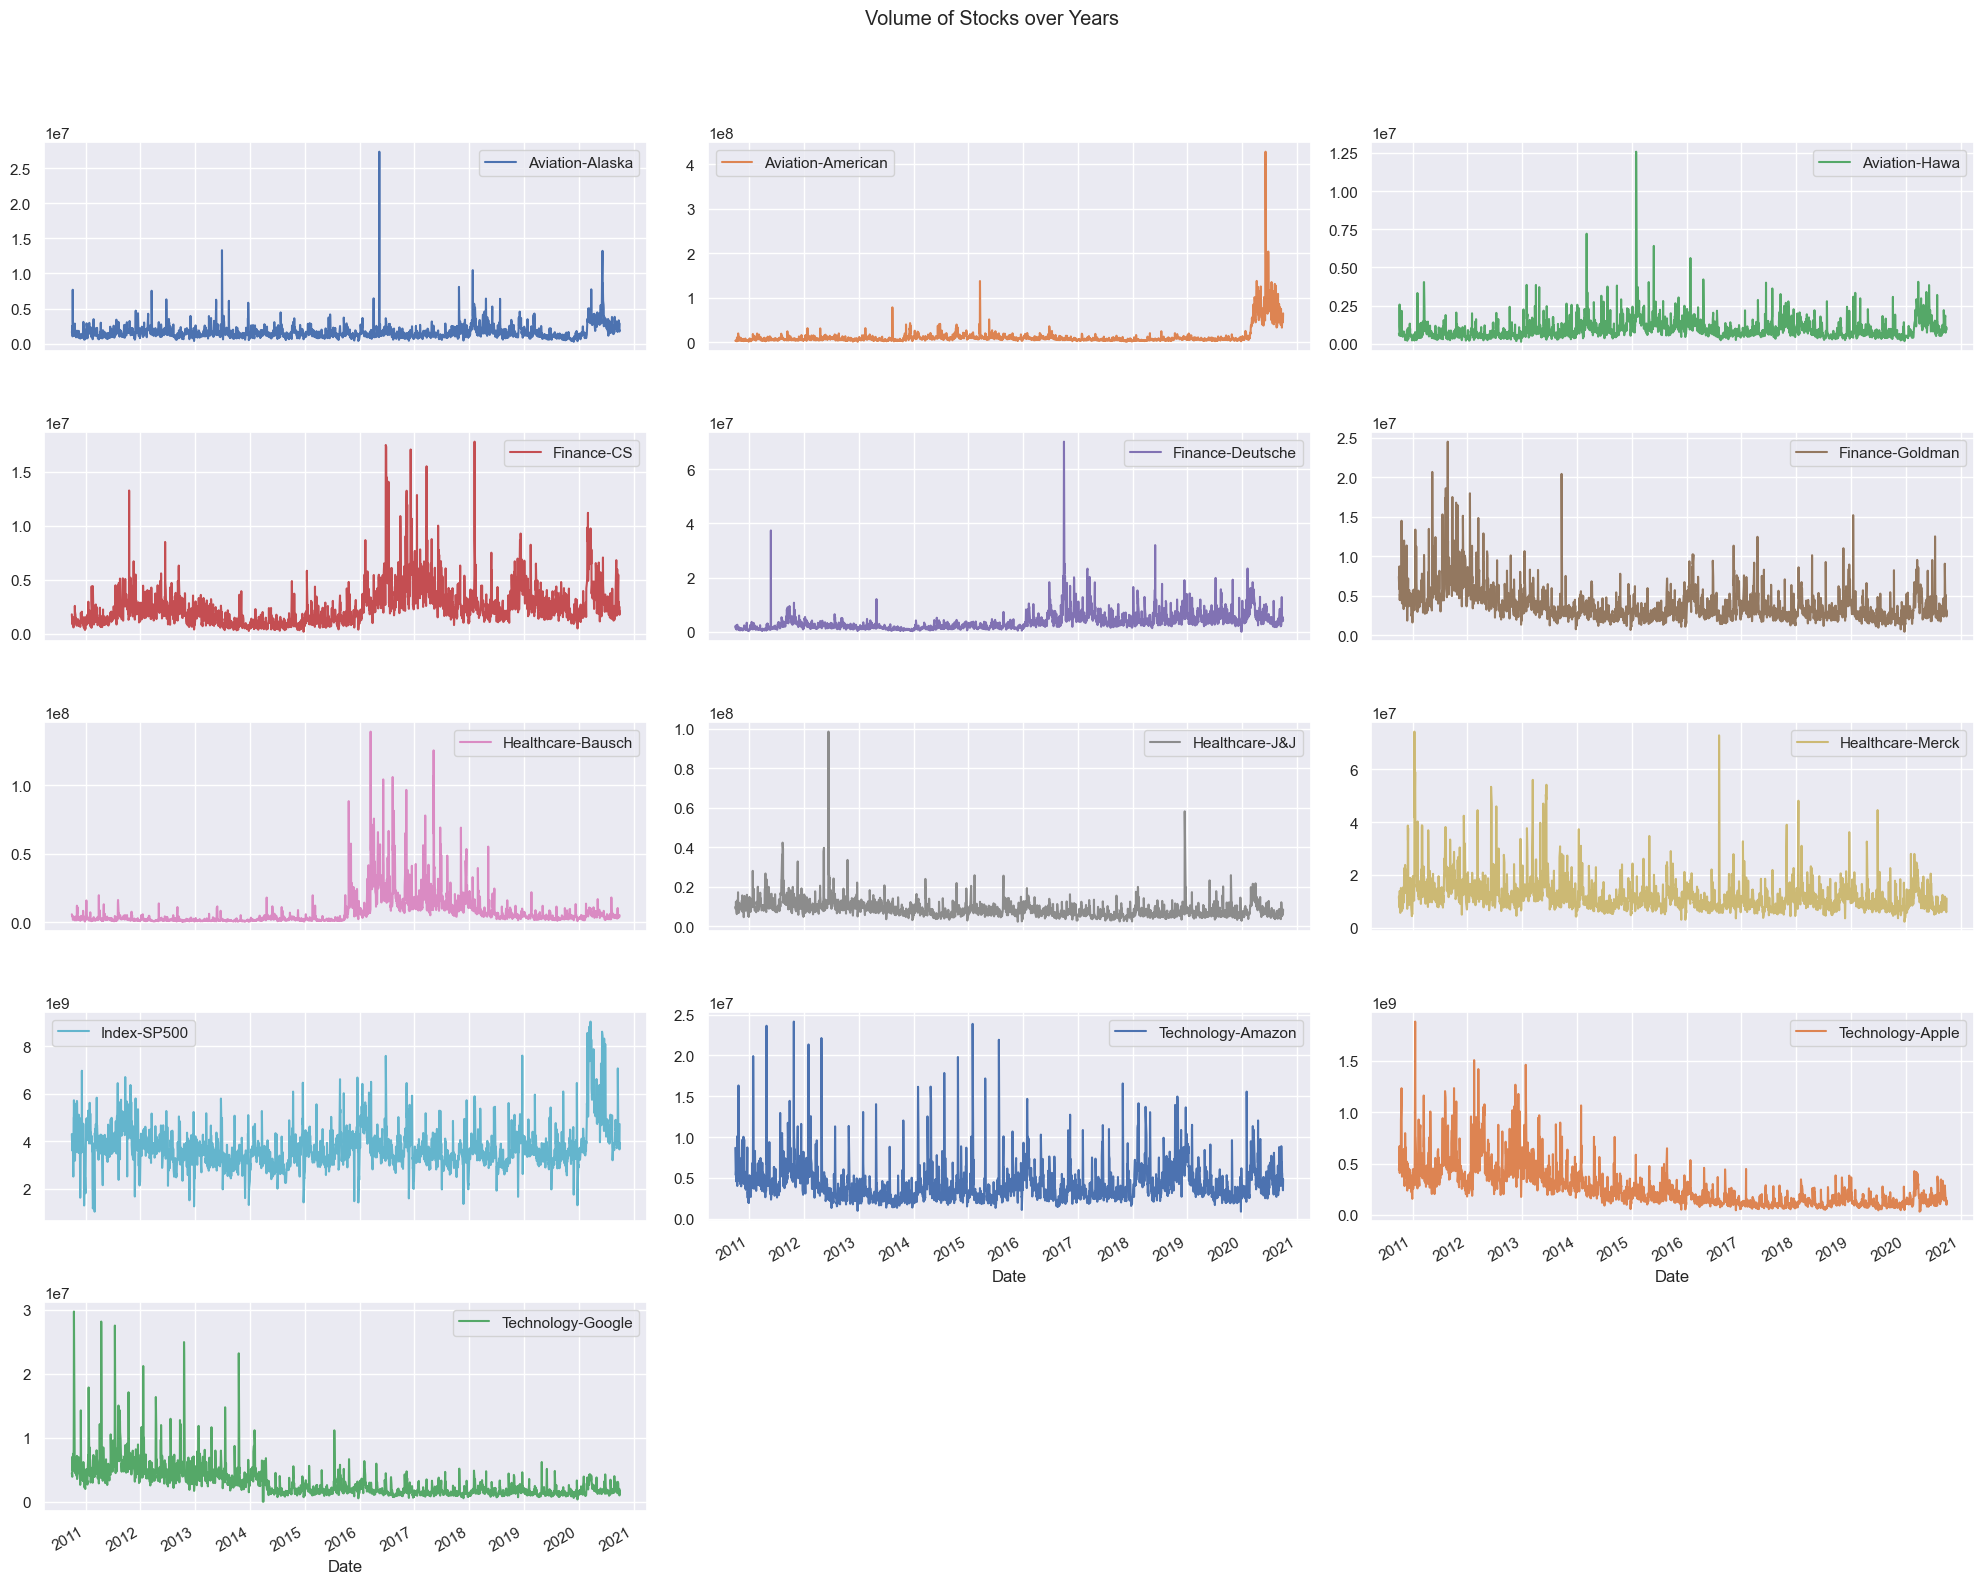

In [55]:
#Creating Sub-plots to visualize the stocks volume
Stock_volume.plot(kind = 'line',subplots=True, layout = (7,3),figsize=(20,20))
plt.tight_layout()
plt.suptitle("Volume of Stocks over Years",y=1.05)
plt.show()


- The volumes have gone up in 2020-21 for all the stocks in Aviation industry In the Tech sector - Apple and Google stock volumes are more or less stabilized although the volumes traded were higher during 2011-2014; However, Amazon stocks are fluctuating in volumes.

#### Explore the movement in actual prices of stocks over a period of time

In [56]:
stock_prices.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

#### Creating Sub-plots to visualize the stocks movement
 - As the prices are not normalised, its good to view them sectorwise

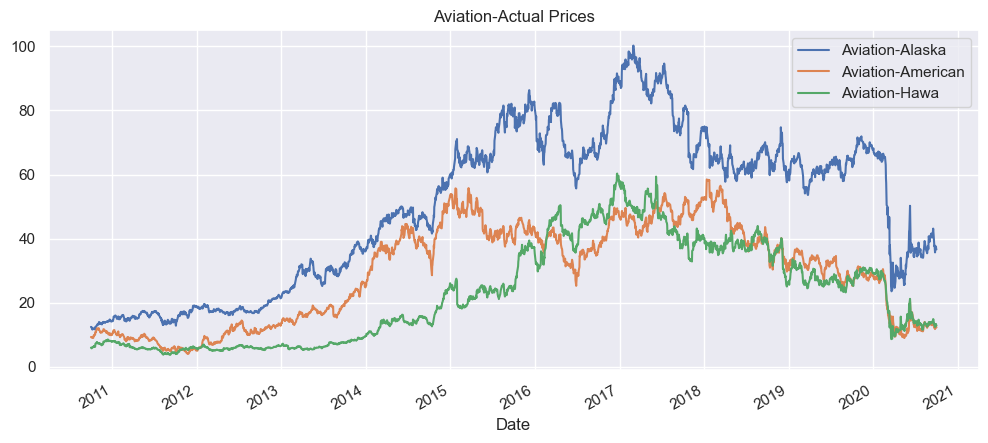

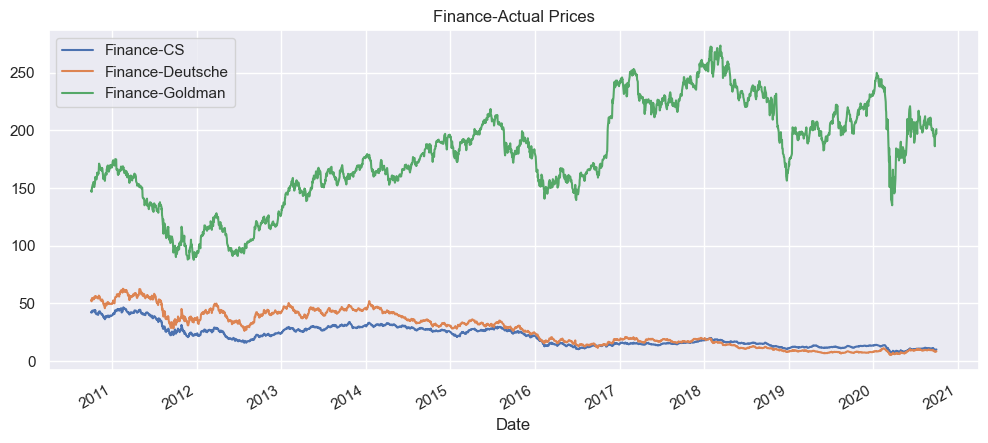

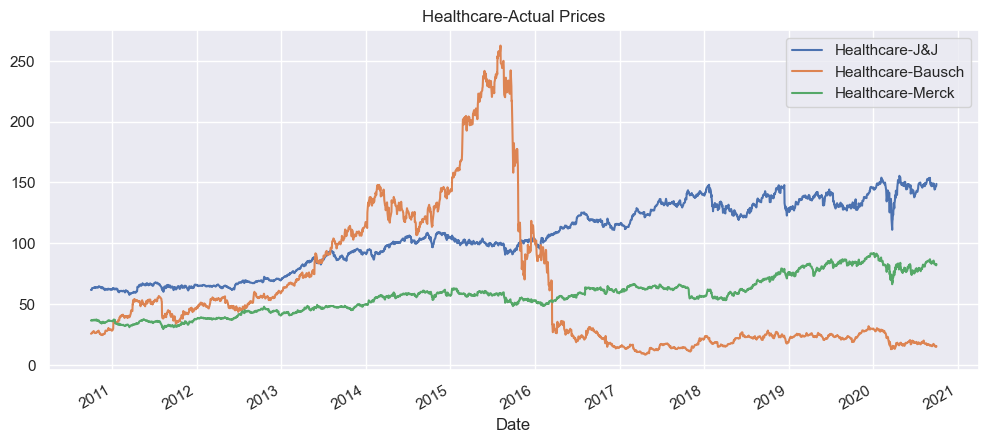

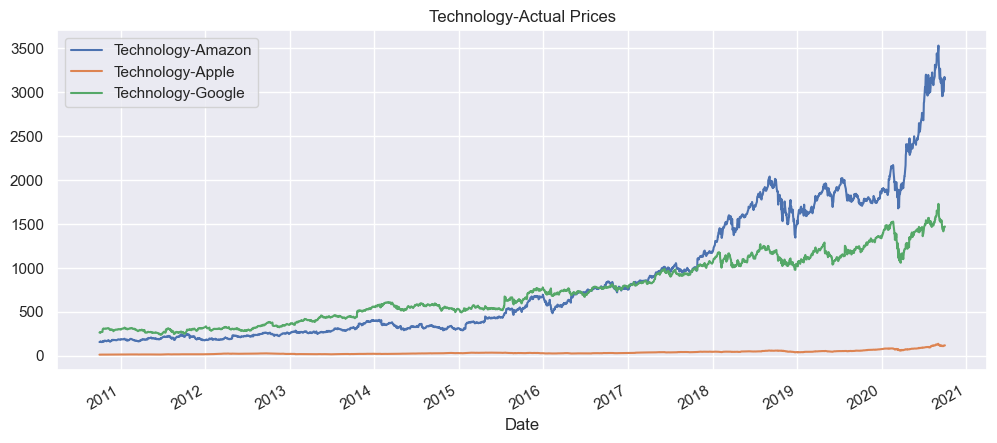

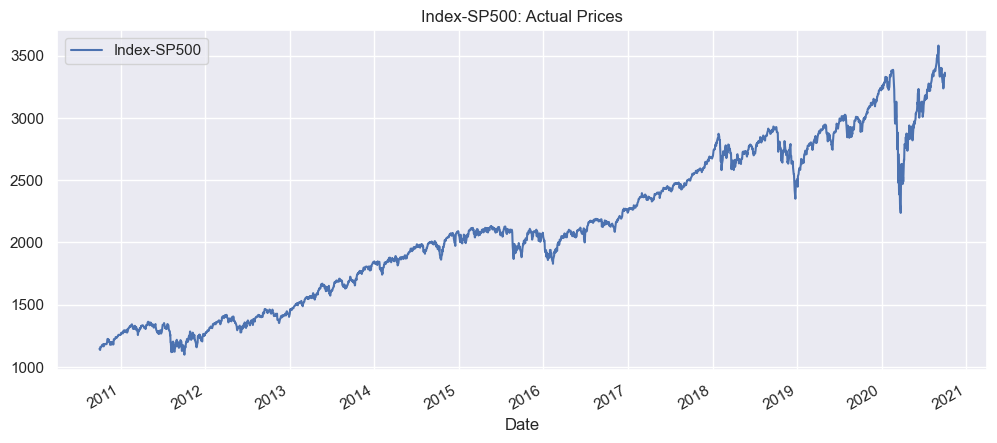

In [57]:
# Plotting the actual prices of stocks- industry wise

# Plotting the stocks of Aviation
stock_prices[['Aviation-Alaska', 'Aviation-American', 'Aviation-Hawa']].plot(subplots=False, title = 'Aviation-Actual Prices', figsize=(12,5))

# Plotting the stocks of Finance
stock_prices[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']].plot(subplots=False, title="Finance-Actual Prices", figsize=(12,5))

# Plotting the stocks of Healthcare
stock_prices[['Healthcare-J&J', 'Healthcare-Bausch', 'Healthcare-Merck']].plot(subplots=False, title="Healthcare-Actual Prices", figsize=(12,5))

# Plotting the stocks of Technology
stock_prices[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']].plot(subplots=False, title="Technology-Actual Prices", figsize=(12,5))

# Plotting the stocks of Index
stock_prices[['Index-SP500']].plot(subplots=False, title="Index-SP500: Actual Prices", figsize=(12,5))

plt.show()



- Both Finance and Aviation indusry stocks are in downtrend.
- In the Healcare, J&J and Merck show a slight uptrend while Bausch faces a downfall
- Tech industry's stocks shows an uptrend especially Amazon and Google.
- There is a significant difference in the prices levels of stocks within the sector itself.
- The market index shows a clear uptrend despite a couple of sharp falls in some years.

#### Comparison of price of stocks among the industry and with the index using normalized values
 - The stock prices of various stocks here are on different scales. Hence, we need to perform normalisation to have them on the same scale for analysis. MinMax scaler is used for normalization.

In [58]:
# Creating a copy of Price dataframe for normalization
stock_prices_normal=stock_prices.copy()

# Checking the data
stock_prices_normal.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

In [59]:
# Normalizing the Data using MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(stock_prices_normal)
stock_price_normalized = pd.DataFrame(scaler.transform(stock_prices_normal), index=stock_prices_normal.index, columns = stock_prices_normal.columns)
stock_price_normalized.head()
# X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01         0.009338           0.097118       0.038570    0.892402   
2010-10-04         0.005896           0.093997       0.034855    0.884559   
2010-10-05         0.006714           0.096016       0.036624    0.915686   
2010-10-06         0.006404           0.096016       0.038747    0.922794   
2010-10-07         0.000056           0.096200       0.041932    0.928676   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01          0.824503         0.323137           0.067871   
2010-10-04          0.809808         0.317051           0.068344   
2010-10-05          0.848214         0.333208           0.070037   
2010-10-06          0.859736         0.340047           0.071572   
2010-10-07          0.849717         0.341502           0.071218   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01        0.041799          0.109111     0.018943           0.000201   
2010-10-04        0.040981          0.107826     0.015232           0.000699   
2010-10-05        0.052529          0.115861     0.024790           0.002321   
2010-10-06        0.056719          0.115700     0.024476           0.000702   
2010-10-07        0.056822          0.110879     0.023706           0.000959   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01          0.001115           0.016944  
2010-10-04          0.000000           0.015852  
2010-10-05          0.002961           0.021154  
2010-10-06          0.003033           0.019859  
2010-10-07          0.003042           0.018410

In [60]:
stock_price_normalized.describe()

Aviation-Alaska  Aviation-American  Aviation-Hawa   Finance-CS  \
count      2517.000000        2517.000000    2517.000000  2517.000000   
mean          0.433437           0.466268       0.337764     0.372239   
std           0.272930           0.279271       0.273939     0.225583   
min           0.000000           0.000000       0.000000     0.000000   
25%           0.171067           0.165412       0.057502     0.177443   
50%           0.529452           0.523591       0.320771     0.325522   
75%           0.627849           0.701303       0.585987     0.529068   
max           1.000000           1.000000       1.000000     1.000000   

       Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
count       2517.000000      2517.000000        2517.000000     2517.000000   
mean           0.381928         0.494928           0.210113        0.486636   
std            0.269669         0.228379           0.225070        0.287933   
min            0.000000         0.000000           0.000000        0.000000   
25%            0.139822         0.362398           0.053777        0.248033   
50%            0.400567         0.482174           0.119090        0.473991   
75%            0.622455         0.667169           0.321877        0.749310   
max            1.000000         1.000000           1.000000        1.000000   

       Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
count       2517.000000  2517.000000        2517.000000       2517.000000   
mean           0.439516     0.407865           0.207673          0.189194   
std            0.243685     0.246706           0.220577          0.166066   
min            0.000000     0.000000           0.000000          0.000000   
25%            0.255825     0.186548           0.033584          0.072528   
50%            0.439820     0.391677           0.112692          0.142005   
75%            0.550860     0.627443           0.398698          0.265729   
max            1.000000     1.000000           1.000000          1.000000   

       Technology-Google  
count        2517.000000  
mean            0.331075  
std             0.244472  
min             0.000000  
25%             0.112010  
50%             0.278360  
75%             0.549200  
max             1.000000


- After normalization, the values are in the range of 0 to 1.

- Now we will observe the visualisation of normalised data - as it becomes easier for us to compare the performance.

In [61]:
list(stock_price_normalized.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

#### Plotting the Normalized Prices of stocks- industrywise

<AxesSubplot:title={'center':'Aviation-Normalised Prices'}, xlabel='Date'>

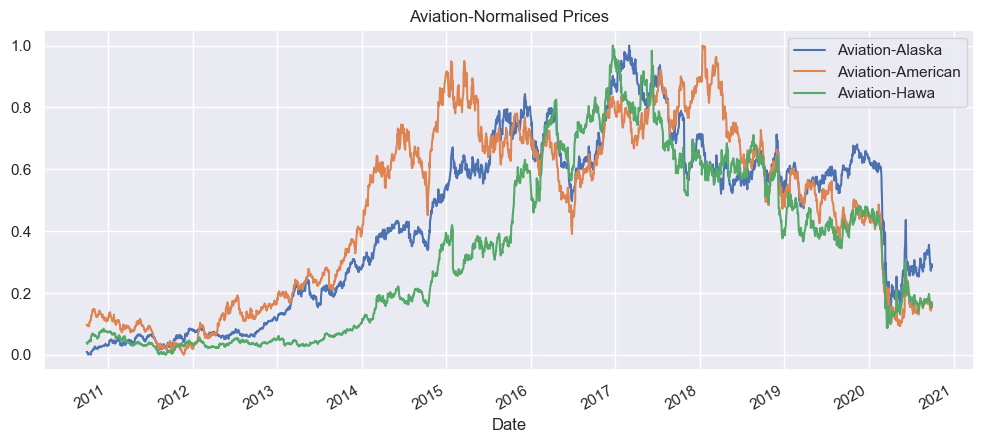

In [62]:
# Plotting the stocks of Aviation
stock_price_normalized[['Aviation-Alaska', 'Aviation-American', 'Aviation-Hawa']].plot(subplots=False, title = 'Aviation-Normalised Prices', figsize=(12,5))


- In aviation industry, all the three companies show a downtrend.

<AxesSubplot:title={'center':'Finance-Normalised Prices'}, xlabel='Date'>

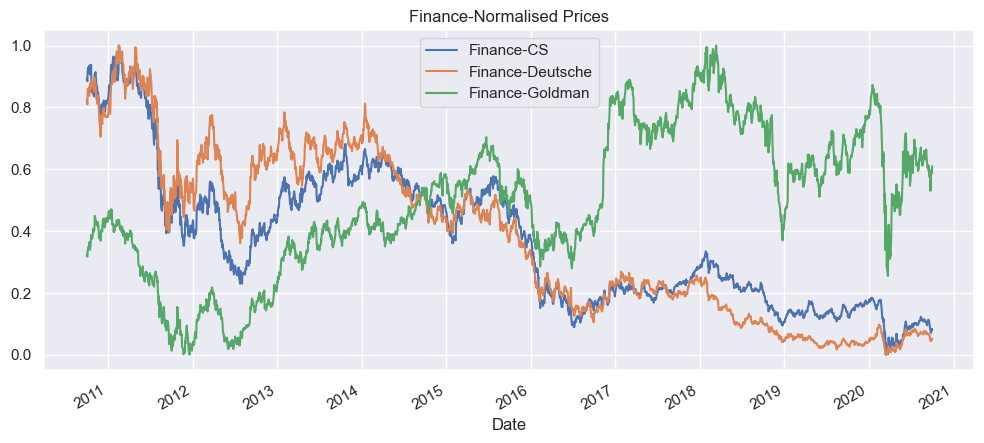

In [63]:
# Plotting the stocks of Finance

stock_price_normalized[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']].plot(subplots=False, title="Finance-Normalised Prices", figsize=(12,5))


- In Finance - All three show downtrend; however the level of prices and the rate of downtrend vary.


<AxesSubplot:title={'center':'Healthcare-Normalised Prices'}, xlabel='Date'>

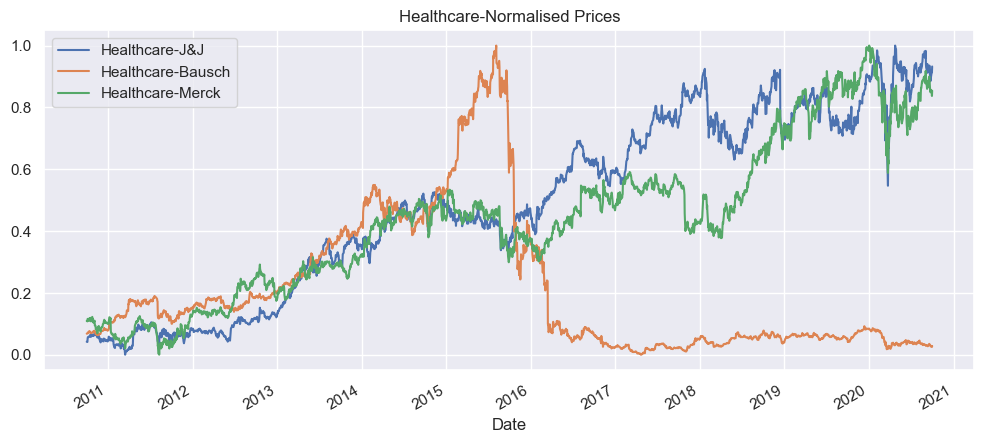

In [64]:
# Plotting the stocks of Healthcare
stock_price_normalized[['Healthcare-J&J', 'Healthcare-Bausch', 'Healthcare-Merck']].plot(subplots=False, title="Healthcare-Normalised Prices", figsize=(12,5))


- The price levels of Bausche is higher than the other two.
- In healthcare - Jhonson &Jhonson and Bausche show uptrend.


<AxesSubplot:title={'center':'Technology-Normalised Prices'}, xlabel='Date'>

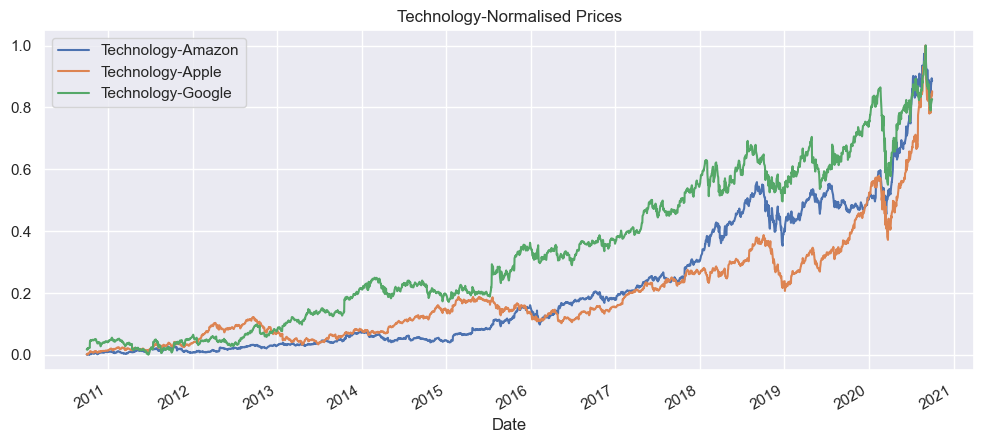

In [65]:
# Plotting the stocks of Technology
stock_price_normalized[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']].plot(subplots=False, title="Technology-Normalised Prices", figsize=(12,5))



- In technology, all the three are showing an uptrend.

<AxesSubplot:title={'center':'Index-SP500: Normalised Prices'}, xlabel='Date'>

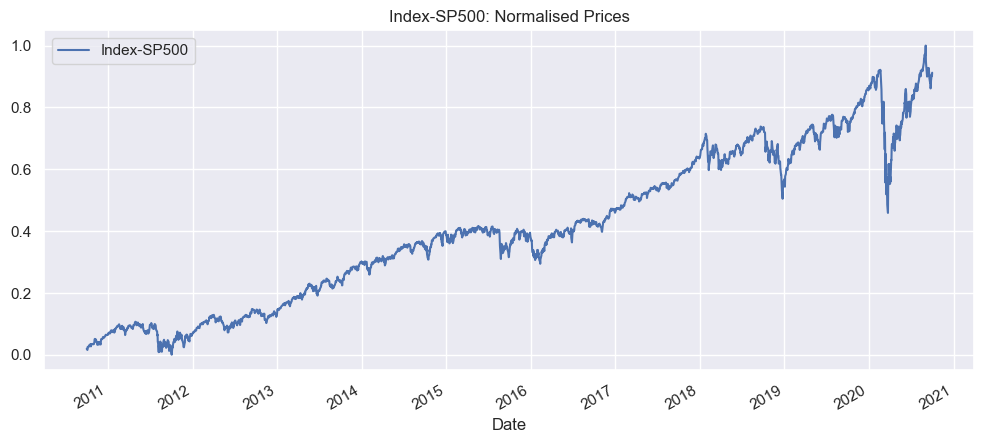

In [66]:
# Plotting the stocks of Index
stock_price_normalized[['Index-SP500']].plot(subplots=False, title="Index-SP500: Normalised Prices", figsize=(12,5))


#### Relative Strength Index of Stocks: Stock Price with respect to Index
- Its a composite index which helps to compare the movement of stock price with respect to the index.

- RSI = Price of Stock/Price of Index

In [67]:
# Calculate Relative strength index of each stock with respect to the Market index
rsi = stock_prices.copy()
for column in rsi.columns:
    rsi[column] = rsi[column]/rsi['Index-SP500']

In [68]:
# Checking the data
rsi.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01         0.010859           0.008105       0.005200    0.036839   
2010-10-04         0.010679           0.008021       0.005057    0.036863   
2010-10-05         0.010523           0.007952       0.005040    0.037178   
2010-10-06         0.010507           0.007957       0.005147    0.037447   
2010-10-07         0.010038           0.007979       0.005311    0.037711   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01          0.045885         0.128856           0.022465   
2010-10-04          0.045518         0.128906           0.022752   
2010-10-05          0.046479         0.128856           0.022658   
2010-10-06          0.047078         0.130038           0.023009   
2010-10-07          0.046661         0.130485           0.022969   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01        0.053872          0.031930          1.0         153.710007   
2010-10-04        0.054238          0.032119          1.0         155.389999   
2010-10-05        0.054103          0.031893          1.0         160.869995   
2010-10-06        0.054493          0.031906          1.0         155.399994   
2010-10-07        0.054591          0.031700          1.0         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

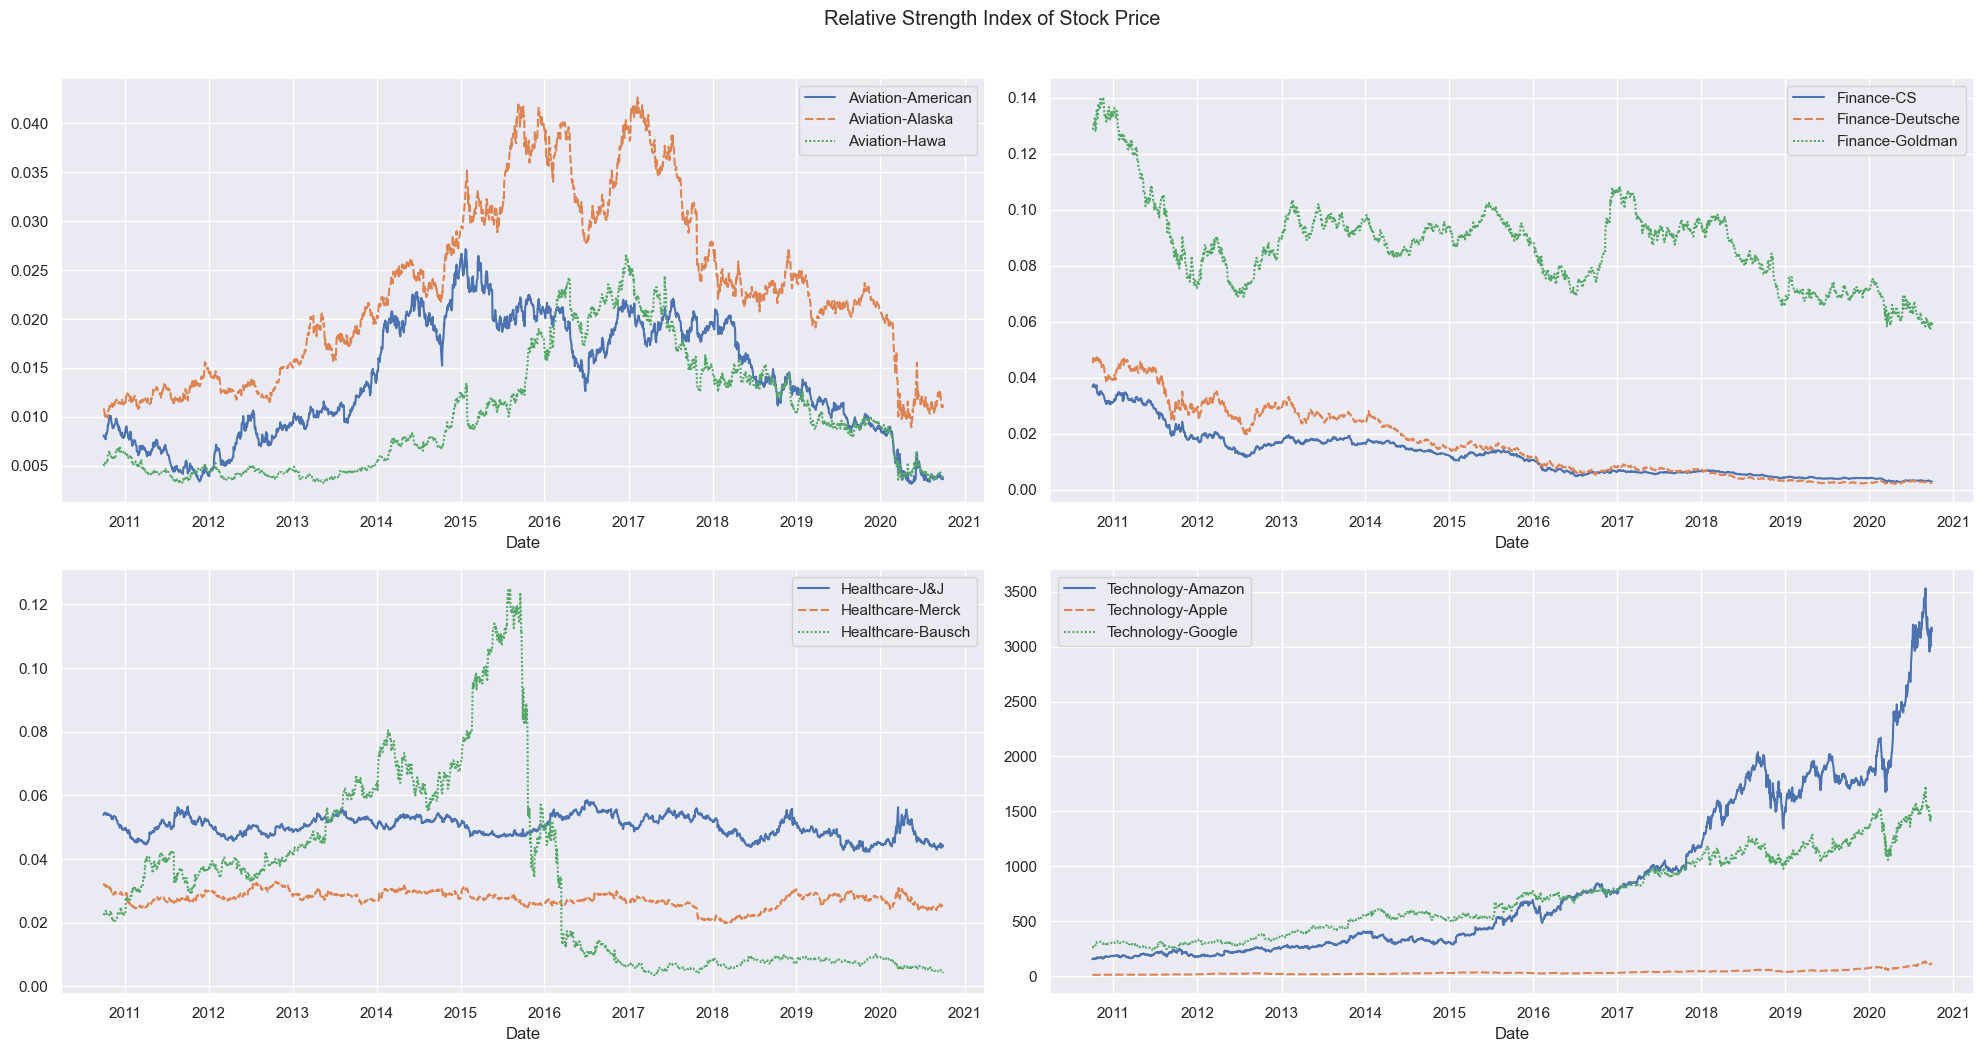

In [69]:
# Plotting the Relative Stock Price change 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(data = rsi[['Aviation-American','Aviation-Alaska','Aviation-Hawa']])
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(2,2,2)
sns.lineplot(data = rsi[['Finance-CS','Finance-Deutsche','Finance-Goldman']])
plt.tight_layout()
plt.subplot(2,2,3)
sns.lineplot(data = rsi[['Healthcare-J&J','Healthcare-Merck','Healthcare-Bausch',]])
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(2,2,4)
sns.lineplot(data = rsi[['Technology-Amazon','Technology-Apple', 'Technology-Google']])
plt.legend(loc='best')
plt.tight_layout()
plt.suptitle("Relative Strength Index of Stock Price",y=1.05)
plt.show()


- The relative strength Index also confirms the earlier findings. The only industry in uptrend is Technology; Although their price levels are highly different
- In healthcare, J&J and Bausche move parallelly with the index.
- Stocks in Healthcare and Finance industry show a downtrend.

#### Stock anaysis to find most suitable stock
 - Analysis of stocks is done to select the stocks that are most suitable in line with the finanical goals of the client. The steps include, analysing the performance of each stock based on key metrics and selection of most suitable stocks to build portfolio.

#### Evaluating the stocks based on key metrics of CAPM
- The metrics include

  - Daily returns
  - Annulaized (daily)returns
  - Cumulative returns
  - Annualized Risk
  - Sharpe Ratio
  - Beta
  - Expected Returns

#### Daily Return
 - This is the percentage change in the prices from previous day

In [70]:
# Calculting daily returns
daily_returns = stock_prices.pct_change()

daily_returns = round((daily_returns[1:]*100),2)
daily_returns.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-04            -2.45              -1.83          -3.52       -0.74   
2010-10-05             0.60               1.21           1.74        2.96   
2010-10-06            -0.23               0.00           2.05        0.66   
2010-10-07            -4.62               0.11           3.02        0.54   
2010-10-08             3.63              -1.84           0.00       -1.57   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-04             -1.60            -0.77               0.47   
2010-10-05              4.24             2.05               1.66   
2010-10-06              1.22             0.85               1.48   
2010-10-07             -1.05             0.18              -0.34   
2010-10-08             -0.30             1.03               0.90   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-04           -0.13             -0.22        -0.80               1.09   
2010-10-05            1.83              1.37         2.09               3.53   
2010-10-06            0.65             -0.03        -0.07              -3.40   
2010-10-07            0.02             -0.81        -0.16               0.56   
2010-10-08            0.02              0.54         0.61              -0.46   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-04             -1.37              -0.62  
2010-10-05              3.70               3.04  
2010-10-06              0.09              -0.72  
2010-10-07              0.01              -0.81  
2010-10-08              1.68               1.20

In [71]:
list(stock_prices.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

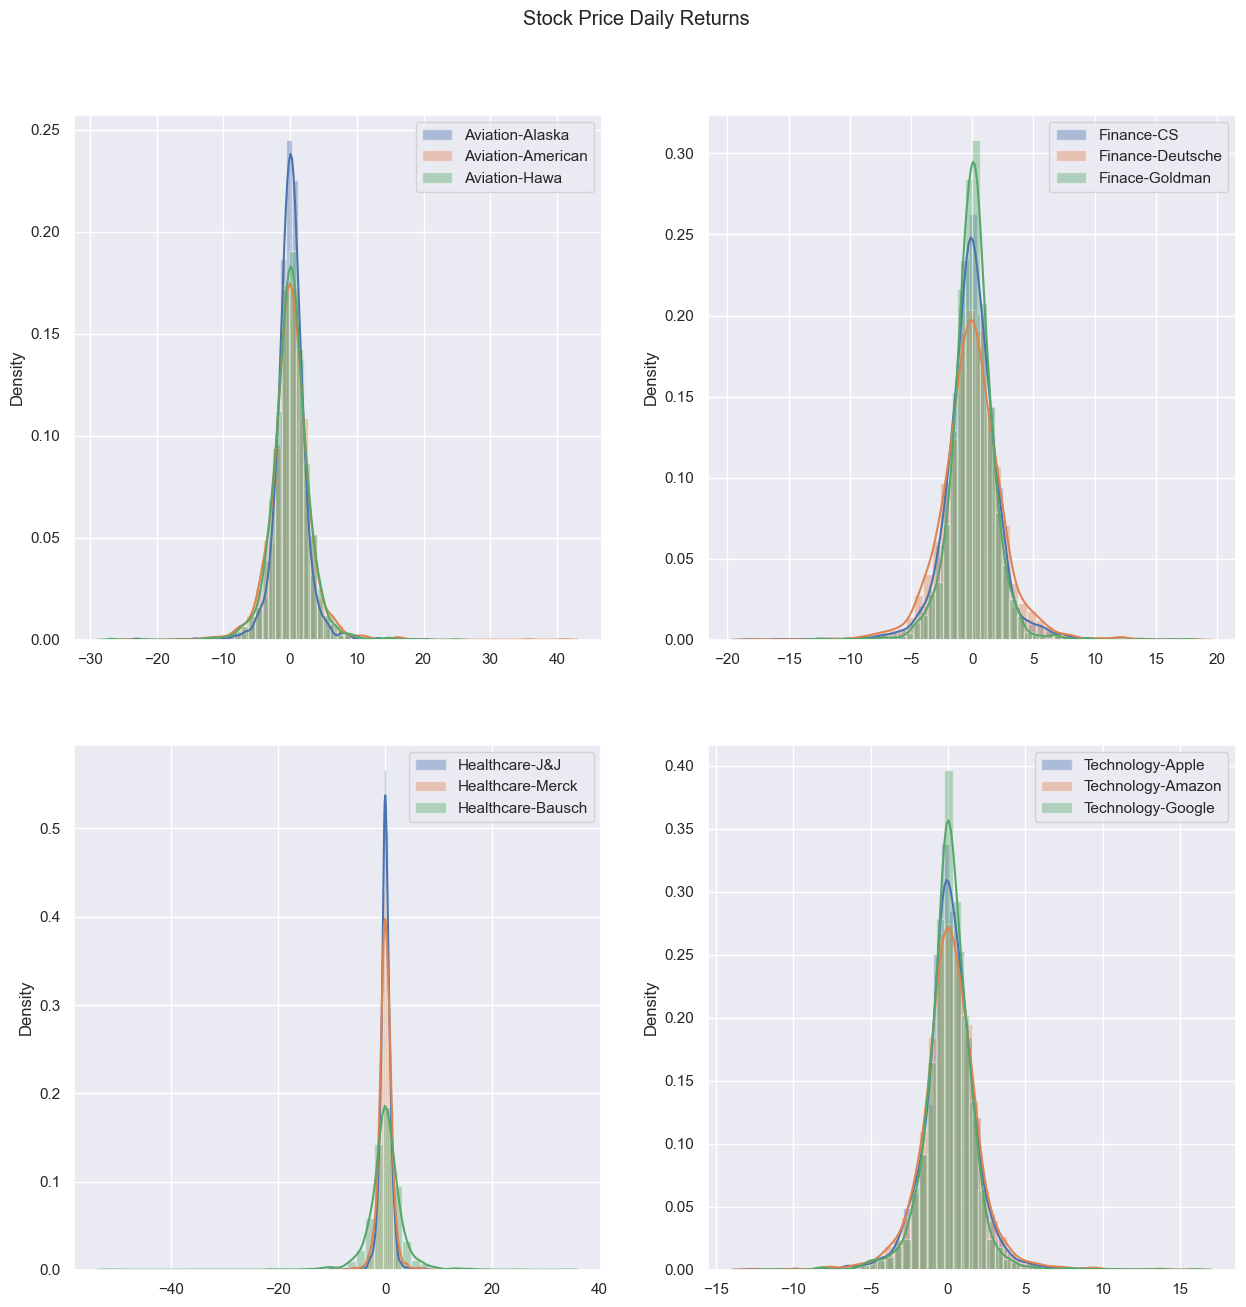

In [72]:
# Visualise the spread in daily return through histogram
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(daily_returns[['Aviation-Alaska']],hist=True,label='Aviation-Alaska')
sns.distplot(daily_returns[['Aviation-American']],hist=True,label="Aviation-American")
sns.distplot(daily_returns[['Aviation-Hawa']],hist=True,label="Aviation-Hawa")
plt.legend()
                            
plt.subplot(2,2,2)
sns.distplot(daily_returns[['Finance-CS']],hist=True,label="Finance-CS")
sns.distplot(daily_returns[['Finance-Deutsche']],hist=True,label="Finance-Deutsche")
sns.distplot(daily_returns[['Finance-Goldman']],hist=True,label="Finace-Goldman")
plt.legend()
                            
plt.subplot(2,2,3)
sns.distplot(daily_returns[['Healthcare-J&J']],hist=True,label="Healthcare-J&J")
sns.distplot(daily_returns[['Healthcare-Merck']],hist=True,label="Healthcare-Merck")
sns.distplot(daily_returns[['Healthcare-Bausch']],hist=True,label="Healthcare-Bausch")
plt.legend()
plt.subplot(2,2,4)
sns.distplot(daily_returns[['Technology-Apple']],hist=True,label="Technology-Apple")
sns.distplot(daily_returns[['Technology-Amazon']],hist=True,label="Technology-Amazon")
sns.distplot(daily_returns[['Technology-Google']],hist=True,label="Technology-Google")
plt.legend()
plt.suptitle("Stock Price Daily Returns",y=0.95)
plt.show()

In [73]:
# Checking the statistical values for daily returns of stocks
daily_returns.describe()

Aviation-Alaska  Aviation-American  Aviation-Hawa   Finance-CS  \
count      2516.000000        2516.000000    2516.000000  2516.000000   
mean          0.070910           0.063605       0.076546    -0.032508   
std           2.356139           3.272582       3.014725     2.220487   
min         -23.240000         -25.220000     -26.970000   -18.260000   
25%          -1.010000          -1.410000      -1.380000    -1.090000   
50%           0.080000           0.020000       0.045000     0.000000   
75%           1.162500           1.562500       1.530000     1.080000   
max          20.310000          41.100000      24.580000    16.340000   

       Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
count       2516.000000      2516.000000        2516.000000     2516.000000   
mean          -0.038164         0.029062           0.046475        0.040855   
std            2.637406         1.833194           3.569884        1.084655   
min          -17.490000       -12.710000         -51.460000      -10.040000   
25%           -1.392500        -0.840000          -1.300000       -0.430000   
50%           -0.050000         0.050000           0.040000        0.030000   
75%            1.370000         0.942500           1.500000        0.570000   
max           17.950000        17.580000          33.740000        8.000000   

       Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
count       2516.000000  2516.000000        2516.000000       2516.000000   
mean           0.041045     0.048752           0.139754          0.112683   
std            1.304925     1.093387           1.989001          1.771761   
min           -8.900000   -11.980000         -12.660000        -12.860000   
25%           -0.610000    -0.330000          -0.812500         -0.700000   
50%            0.030000     0.065000           0.110000          0.090000   
75%            0.730000     0.520000           1.150000          1.020000   
max           10.410000     9.380000          15.750000         11.980000   

       Technology-Google  
count        2516.000000  
mean            0.081765  
std             1.628830  
min           -11.100000  
25%            -0.640000  
50%             0.070000  
75%             0.862500  
max            16.050000


- From the above table we can observe that the level of price variation each day. However,this won't be sufficient to draw any inference. Hence from the daily returns, annualised daily returns need to be calculated for each stock.

#### Annualized (Daily) Returns
  - Steps include:

    - Calculate the annualised daily return Annualised daily return = Mean of daily returns *252; As the markets function for about 252 days in a year, this is taken for calculating the annualized daily return.
    - Create a new Risk-Return dataframe to store the result

In [74]:
#Calculating Annualized (Daily) Returns

annualized_returns = []
col=[]

for i in daily_returns.columns:
    col.append(i)

for i in daily_returns.columns:
    annualized_returns.append(daily_returns[i].mean()*252)

In [75]:
# Creating a dataframe for mapping the risk return metrics of stocks
CAPM_df=pd.DataFrame(list(zip(col,annualized_returns)),columns =['Stocks', 'Annualized Returns'])

In [76]:
# Renaming the names of stocks
for i in CAPM_df.index:
    CAPM_df['Stocks'][i]=CAPM_df['Stocks'][i].replace("Close_","")

In [77]:
# Checking the data
CAPM_df['Annualized Returns']=round(CAPM_df['Annualized Returns'],2)
CAPM_df

Stocks  Annualized Returns
0     Aviation-Alaska               17.87
1   Aviation-American               16.03
2       Aviation-Hawa               19.29
3          Finance-CS               -8.19
4    Finance-Deutsche               -9.62
5     Finance-Goldman                7.32
6   Healthcare-Bausch               11.71
7      Healthcare-J&J               10.30
8    Healthcare-Merck               10.34
9         Index-SP500               12.29
10  Technology-Amazon               35.22
11   Technology-Apple               28.40
12  Technology-Google               20.60

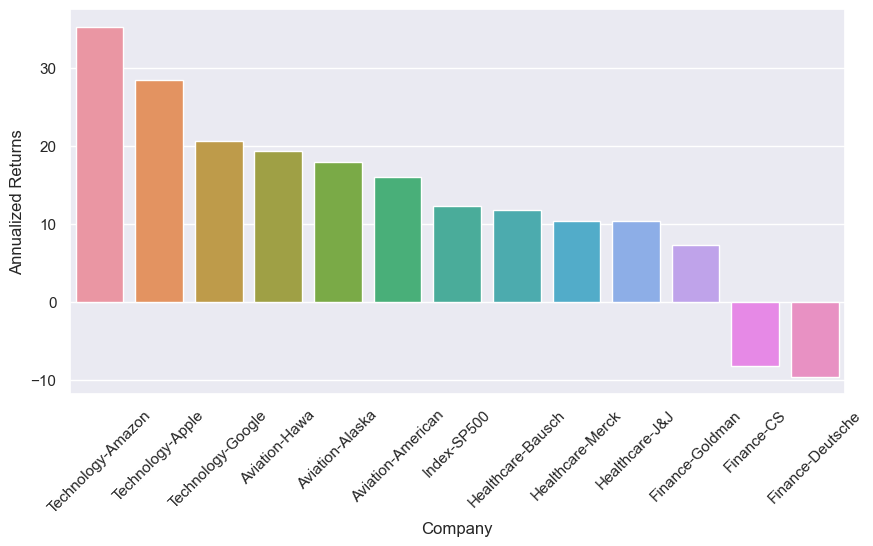

In [78]:
# Plotting the Annualized (Daily) returns
plt.figure(figsize=[10,5])
sns.barplot(data=CAPM_df.sort_values("Annualized Returns", ascending=False),x="Stocks",y="Annualized Returns")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()


- All tech stocks have given positive returns; The highest returns have been from Amazon followed by Apple and then Google.These are the top three among the 12 stocks as well.
- Aviation stocks performed better next to tech companies; all are positve and above the SP500 index.
- In healthcare also all three stocks show positive annualised (daily) return; however, the returns are lesser than SP500.
- Under finance sector, except Goldman, the other two gave negative returns.
- Next cumulative return from all the stocks for the entire period need to be computed.

## Cumulative Return
- Steps include:

    - Calculate the cumulative return Cumulative return = ((Oldest price/Latest price)-1)*100
    - Add the result in the Risk-Return dataframe created already

In [79]:
#Calculating Cummulative_returns

cum_return =[]
for i in daily_returns.columns:
    cum_return.append(stock_prices[i][-1]/stock_prices[i][0]-1)

In [80]:
# Adding Cumulative_ret column to the dataframe
CAPM_df['Cumulative Return']= cum_return

CAPM_df['Cumulative Return']=round(CAPM_df['Cumulative Return'],4)*100

In [81]:
CAPM_df

Stocks  Annualized Returns  Cumulative Return
0     Aviation-Alaska               17.87             194.28
1   Aviation-American               16.03              32.29
2       Aviation-Hawa               19.29             116.28
3          Finance-CS               -8.19             -76.39
4    Finance-Deutsche               -9.62             -84.03
5     Finance-Goldman                7.32              36.07
6   Healthcare-Bausch               11.71             -39.65
7      Healthcare-J&J               10.30             141.10
8    Healthcare-Merck               10.34             126.64
9         Index-SP500               12.29             193.39
10  Technology-Amazon               35.22            1948.49
11   Technology-Apple               28.40            1047.77
12  Technology-Google               20.60             461.28

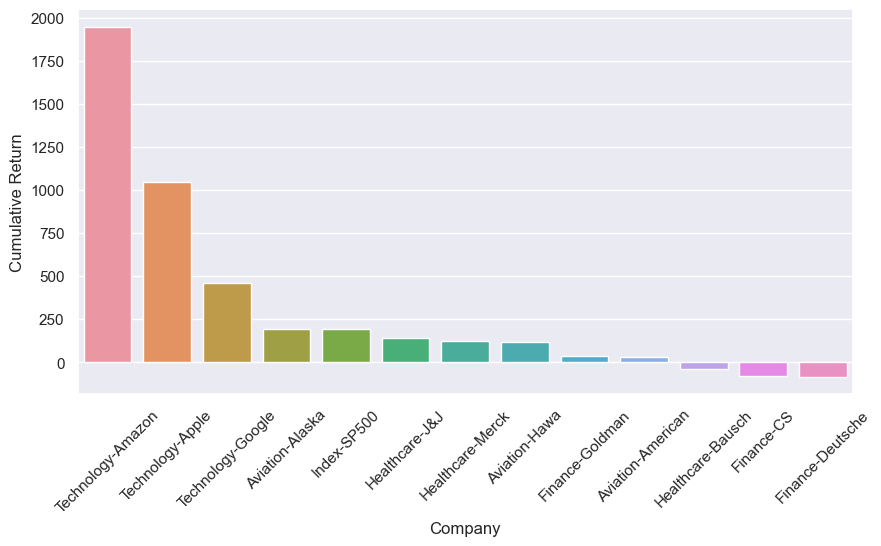

In [82]:
# Plot the Cumulative return of all the stocks
plt.figure(figsize=[10,5])
sns.barplot(data=CAPM_df.sort_values("Cumulative Return", ascending=False),x="Stocks",y="Cumulative Return")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()

- Highest cumulative returns have been provided by technology stocks.
- There are three stocks with negative returns two from finance and one from Healthcare.
- To meet the investment goals of the client, we will not include any stocks giving negative returns in the portfolio.

#### Annualized Risk
- The risk is measured by way of standard deviation. Although its viewed through describe function earlier, it needs to be worked out separately and appended with the Risk-Return dataframe.

##### Steps include,

    - Calculate annualized risk
    - Add the result in the Risk-Return dataframe

In [83]:
#Calculating Annualized_Risk
annualized_risk = []

for i in daily_returns.columns:
    annualized_risk.append(daily_returns[i].std()*np.sqrt(252))

In [84]:
# Adding Annualized Risk column to the dataframe
CAPM_df['Annualized Risk']= annualized_risk

CAPM_df['Annualized Risk']=round(CAPM_df['Annualized Risk'],2)

In [85]:
# Checking the data
CAPM_df

Stocks  Annualized Returns  Cumulative Return  Annualized Risk
0     Aviation-Alaska               17.87             194.28            37.40
1   Aviation-American               16.03              32.29            51.95
2       Aviation-Hawa               19.29             116.28            47.86
3          Finance-CS               -8.19             -76.39            35.25
4    Finance-Deutsche               -9.62             -84.03            41.87
5     Finance-Goldman                7.32              36.07            29.10
6   Healthcare-Bausch               11.71             -39.65            56.67
7      Healthcare-J&J               10.30             141.10            17.22
8    Healthcare-Merck               10.34             126.64            20.72
9         Index-SP500               12.29             193.39            17.36
10  Technology-Amazon               35.22            1948.49            31.57
11   Technology-Apple               28.40            1047.77            28.13
12  Technology-Google               20.60             461.28            25.86

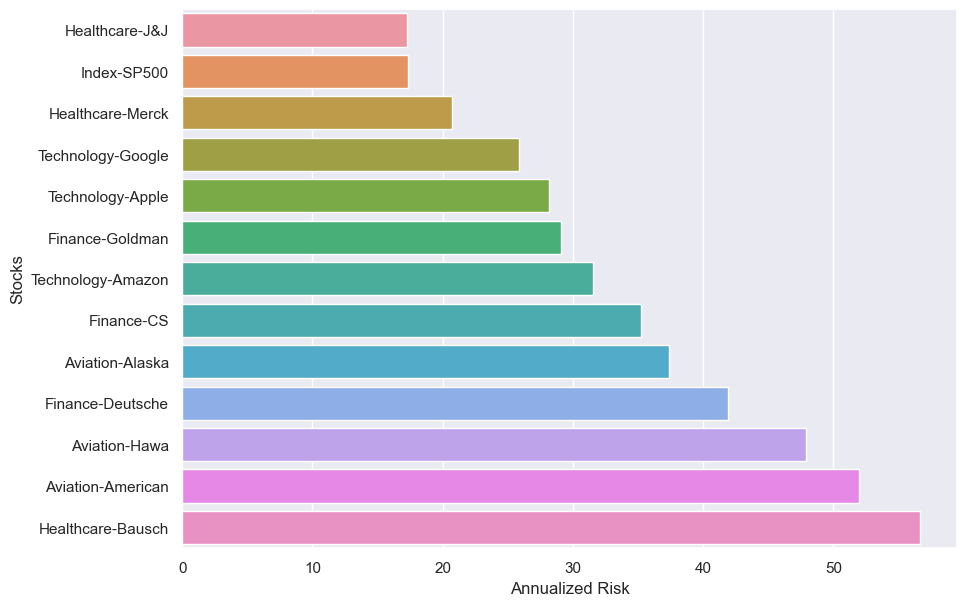

In [86]:
plt.figure(figsize=[10,7])
sns.barplot(data=CAPM_df.sort_values('Annualized Risk', ascending=True),x="Annualized Risk",y="Stocks", label = 'Annualized Risk')
plt.xlabel('Annualized Risk') 
plt.show()


- Risk is high among all the stocks of aviation industry.
- In Finance industry, all stocks are riskier than the index;
- Healthcare industry has the most risky and least risky stocks; Bausch is the riskiest among all the stocks in other industry as well while Jhonson &Jhonson is has the least annualised risk and the only stock which is less riskier than the index among all.
- All the three stocks in Technology industry stocks have moderate risk.

#### Sharpe Ratio
This is one of the key metric under Capital Asset Pricing model. This is a composite index that considers both risk as well as return of a stock. A Sharpe ratio of 1 and above is a good performance. Stocks with negative value must be avoided.

##### Steps include:

    - Calculate the sharpe ratio
    - Add the result in the Risk-Return dataframe

In [87]:
#Calculating Sharpe Ratio with a Risk Free Rate of Return of 0.75%

CAPM_df['Sharpe Ratio'] = round((CAPM_df['Annualized Returns']-0.0075)/CAPM_df['Annualized Risk'],2)

In [88]:
CAPM_df

Stocks  Annualized Returns  Cumulative Return  Annualized Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
3          Finance-CS               -8.19             -76.39            35.25   
4    Finance-Deutsche               -9.62             -84.03            41.87   
5     Finance-Goldman                7.32              36.07            29.10   
6   Healthcare-Bausch               11.71             -39.65            56.67   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio  
0           0.48  
1           0.31  
2           0.40  
3          -0.23  
4          -0.23  
5           0.25  
6           0.21  
7           0.60  
8           0.50  
9           0.71  
10          1.12  
11          1.01  
12          0.80

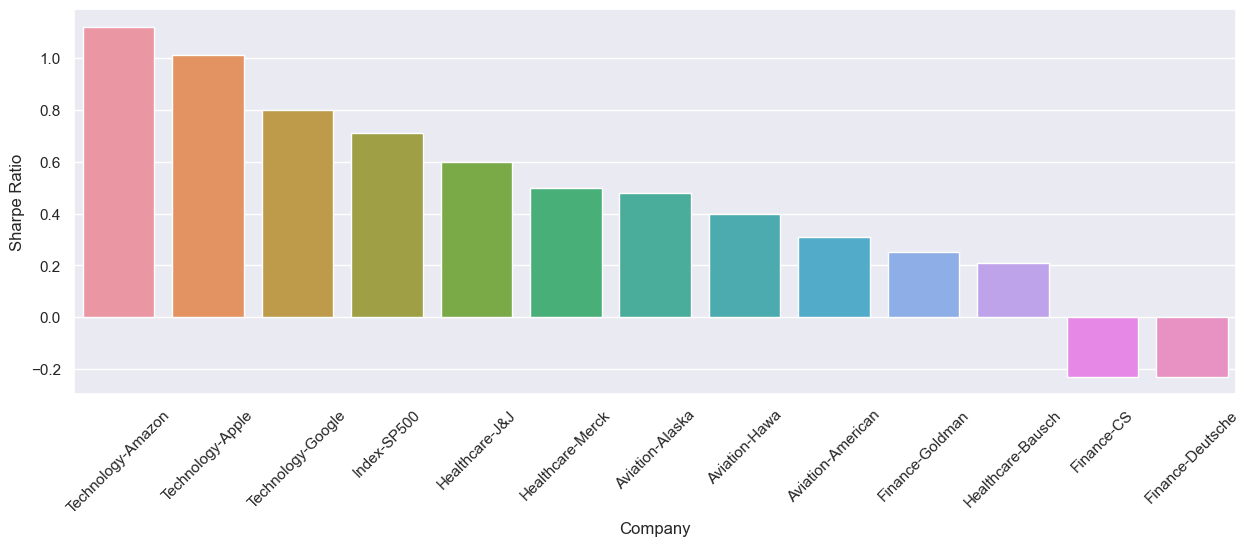

In [89]:
# Plot the Annualized Risk of all the stocks
plt.figure(figsize=[15,5])
sns.barplot(data=CAPM_df.sort_values("Sharpe Ratio", ascending=False),x="Stocks",y="Sharpe Ratio")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()


## Beta for the stocks
- Beta is a measure of voltility. It indicates how much the price of a stock tends to fluctuate up and down compared to market.

- It helps to determine the expected return from the stock.

In [90]:
Beta=[]
for i in range (0,13):

    def find_beta(df):
        np_array = df.values
        m = np_array[:,9] # market returns are column zero from numpy array
        s = np_array[:,i] # stock returns are column one from numpy array
        covariance = np.cov(s,m) # Calculate covariance between stock and market
        beta = covariance[0,1]/covariance[1,1]
        return Beta.append(beta)
    find_beta(daily_returns)

In [91]:
Beta = pd.DataFrame(Beta, index =daily_returns.columns.values,columns =['Beta'])
Beta

Beta
Aviation-Alaska    1.231484
Aviation-American  1.353639
Aviation-Hawa      1.233664
Finance-CS         1.369945
Finance-Deutsche   1.537556
Finance-Goldman    1.301359
Healthcare-Bausch  1.315965
Healthcare-J&J     0.662243
Healthcare-Merck   0.733472
Index-SP500        1.000000
Technology-Amazon  0.998854
Technology-Apple   1.063317
Technology-Google  1.013406

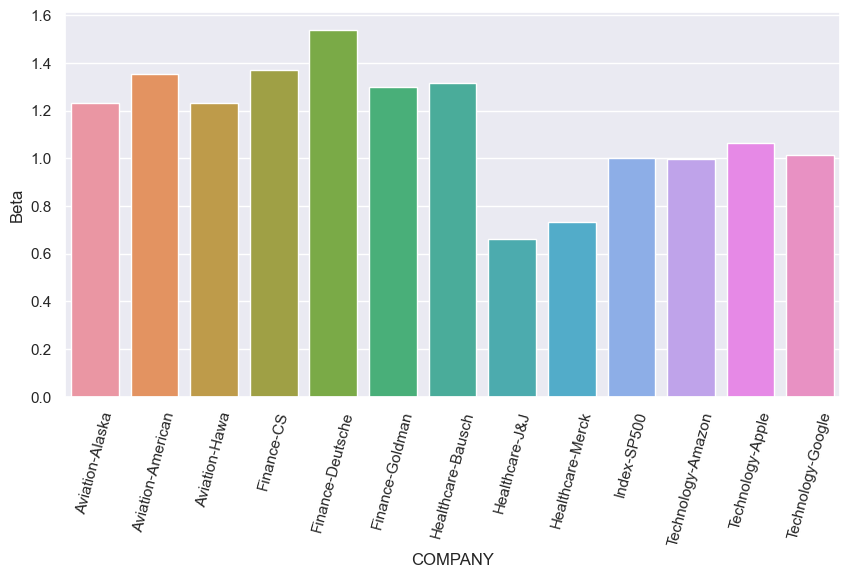

In [92]:
Beta_reset = Beta.reset_index()
plt.figure(figsize=[10,5])
sns.barplot(data=Beta_reset,x="index",y="Beta")
plt.xticks(rotation=75)
plt.xlabel('COMPANY') 
plt.show()

In [93]:
CAPM_df

Stocks  Annualized Returns  Cumulative Return  Annualized Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
3          Finance-CS               -8.19             -76.39            35.25   
4    Finance-Deutsche               -9.62             -84.03            41.87   
5     Finance-Goldman                7.32              36.07            29.10   
6   Healthcare-Bausch               11.71             -39.65            56.67   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio  
0           0.48  
1           0.31  
2           0.40  
3          -0.23  
4          -0.23  
5           0.25  
6           0.21  
7           0.60  
8           0.50  
9           0.71  
10          1.12  
11          1.01  
12          0.80

In [94]:
CAPM_df=CAPM_df.set_index('Stocks')

In [95]:
CAPM_df

Annualized Returns  Cumulative Return  Annualized Risk  \
Stocks                                                                      
Aviation-Alaska                 17.87             194.28            37.40   
Aviation-American               16.03              32.29            51.95   
Aviation-Hawa                   19.29             116.28            47.86   
Finance-CS                      -8.19             -76.39            35.25   
Finance-Deutsche                -9.62             -84.03            41.87   
Finance-Goldman                  7.32              36.07            29.10   
Healthcare-Bausch               11.71             -39.65            56.67   
Healthcare-J&J                  10.30             141.10            17.22   
Healthcare-Merck                10.34             126.64            20.72   
Index-SP500                     12.29             193.39            17.36   
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio  
Stocks                           
Aviation-Alaska            0.48  
Aviation-American          0.31  
Aviation-Hawa              0.40  
Finance-CS                -0.23  
Finance-Deutsche          -0.23  
Finance-Goldman            0.25  
Healthcare-Bausch          0.21  
Healthcare-J&J             0.60  
Healthcare-Merck           0.50  
Index-SP500                0.71  
Technology-Amazon          1.12  
Technology-Apple           1.01  
Technology-Google          0.80

In [96]:
CAPM_df=pd.concat([CAPM_df, Beta['Beta']], axis=1)
CAPM_df

Annualized Returns  Cumulative Return  Annualized Risk  \
Aviation-Alaska                 17.87             194.28            37.40   
Aviation-American               16.03              32.29            51.95   
Aviation-Hawa                   19.29             116.28            47.86   
Finance-CS                      -8.19             -76.39            35.25   
Finance-Deutsche                -9.62             -84.03            41.87   
Finance-Goldman                  7.32              36.07            29.10   
Healthcare-Bausch               11.71             -39.65            56.67   
Healthcare-J&J                  10.30             141.10            17.22   
Healthcare-Merck                10.34             126.64            20.72   
Index-SP500                     12.29             193.39            17.36   
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  
Aviation-Alaska            0.48  1.231484  
Aviation-American          0.31  1.353639  
Aviation-Hawa              0.40  1.233664  
Finance-CS                -0.23  1.369945  
Finance-Deutsche          -0.23  1.537556  
Finance-Goldman            0.25  1.301359  
Healthcare-Bausch          0.21  1.315965  
Healthcare-J&J             0.60  0.662243  
Healthcare-Merck           0.50  0.733472  
Index-SP500                0.71  1.000000  
Technology-Amazon          1.12  0.998854  
Technology-Apple           1.01  1.063317  
Technology-Google          0.80  1.013406


- Less volatile stocks (Beta <1) : J&J, Merck and Amazon show lesser volatility than the market
- High volatile stocks (Beta >1) : All other stocks. However, Apple and Google are only marginally higher than the market' volatility.

## Expected Returns
 - Expected Return = Risk free return +Beta * (Market retun - Risk free return)

In [97]:
rm=CAPM_df['Annualized Returns'].iloc[-4]

In [98]:
# Create a column for expected return
CAPM_df['Expected Return'] = 0.75+CAPM_df['Beta']*(rm-0.75)

In [99]:
CAPM_df

Annualized Returns  Cumulative Return  Annualized Risk  \
Aviation-Alaska                 17.87             194.28            37.40   
Aviation-American               16.03              32.29            51.95   
Aviation-Hawa                   19.29             116.28            47.86   
Finance-CS                      -8.19             -76.39            35.25   
Finance-Deutsche                -9.62             -84.03            41.87   
Finance-Goldman                  7.32              36.07            29.10   
Healthcare-Bausch               11.71             -39.65            56.67   
Healthcare-J&J                  10.30             141.10            17.22   
Healthcare-Merck                10.34             126.64            20.72   
Index-SP500                     12.29             193.39            17.36   
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  Expected Return  
Aviation-Alaska            0.48  1.231484        14.961331  
Aviation-American          0.31  1.353639        16.370992  
Aviation-Hawa              0.40  1.233664        14.986488  
Finance-CS                -0.23  1.369945        16.559167  
Finance-Deutsche          -0.23  1.537556        18.493391  
Finance-Goldman            0.25  1.301359        15.767683  
Healthcare-Bausch          0.21  1.315965        15.936240  
Healthcare-J&J             0.60  0.662243         8.392285  
Healthcare-Merck           0.50  0.733472         9.214265  
Index-SP500                0.71  1.000000        12.290000  
Technology-Amazon          1.12  0.998854        12.276777  
Technology-Apple           1.01  1.063317        13.020675  
Technology-Google          0.80  1.013406        12.444706

In [100]:
# Plot the Expected Return of all the stocks
CAPM_df=CAPM_df.reset_index()

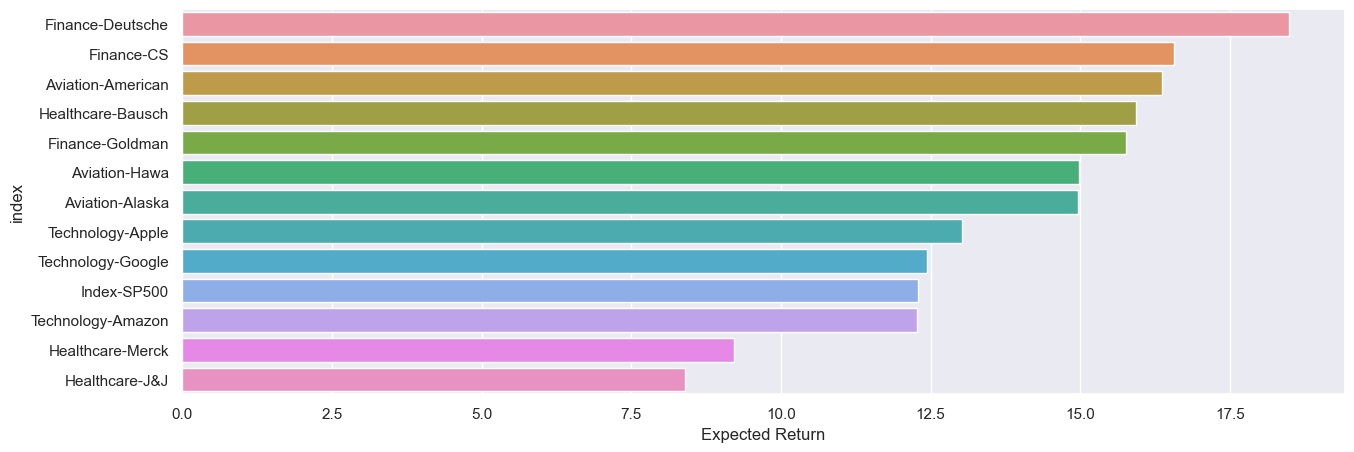

In [101]:
plt.figure(figsize=[15,5])
sns.barplot(data=CAPM_df.sort_values('Expected Return', ascending=False),x="Expected Return",y="index", label = 'Expected Return')
plt.xlabel('Expected Return') 
plt.show()

In [102]:
CAPM_df.to_csv('CAPM.csv')

- Now that we have completed the analysis of stocks using key metrics of CAPM, we need to proceed with building appropriate portfolio based on the need of the client after scrutizing each stock based on these metrics.

#### Select stocks and Build portfolio

- Portfolio needs to be built according to the persona and business goals of the client. This include:

    - Alexandra is a daughter of Ukranian business tycoon and is studying in a college in the US.
    - She intends to form an NGO later with friends and refused to take money from parents for this purpose.
    - She has huge savings from the money sent by parents but doesn’t disclose how much, Wants to invest the money during her college and use the matured amount for the NGO.
    - She is a conservative investor and wants to invest in stocks that gives good returns but are also stable.
    - She is an active investor and wants a comprehensive report on all the metrics used to revise the investment strategy.

    We may have to assume the following:

    - Let the investment amount be 500000 USD
    - Let's assume she is in the first year of her 3 year degree; hence her investment term can be 3 years.
    - we need to build a portfolio consisting of stocks with good returns and low to moderate risk that are less volatile.

#### Selection of stocks for the portfolio
- We set the following criteria for selection of stocks for the portfolio:

    - Stocks with positive annualized returns
    - Positive cumulative returns
    - Sharpe Ratio more than Index
    - Beta on par with the Market index
    - Stocks with positive expected returns

In [103]:
CAPM_df

index  Annualized Returns  Cumulative Return  Annualized Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
3          Finance-CS               -8.19             -76.39            35.25   
4    Finance-Deutsche               -9.62             -84.03            41.87   
5     Finance-Goldman                7.32              36.07            29.10   
6   Healthcare-Bausch               11.71             -39.65            56.67   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio      Beta  Expected Return  
0           0.48  1.231484        14.961331  
1           0.31  1.353639        16.370992  
2           0.40  1.233664        14.986488  
3          -0.23  1.369945        16.559167  
4          -0.23  1.537556        18.493391  
5           0.25  1.301359        15.767683  
6           0.21  1.315965        15.936240  
7           0.60  0.662243         8.392285  
8           0.50  0.733472         9.214265  
9           0.71  1.000000        12.290000  
10          1.12  0.998854        12.276777  
11          1.01  1.063317        13.020675  
12          0.80  1.013406        12.444706

In [104]:
# Dropping the Stocks having negetive Annualized returns
portfolio=CAPM_df.loc[(CAPM_df['Annualized Returns'] > 0.0)]
portfolio

index  Annualized Returns  Cumulative Return  Annualized Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
5     Finance-Goldman                7.32              36.07            29.10   
6   Healthcare-Bausch               11.71             -39.65            56.67   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio      Beta  Expected Return  
0           0.48  1.231484        14.961331  
1           0.31  1.353639        16.370992  
2           0.40  1.233664        14.986488  
5           0.25  1.301359        15.767683  
6           0.21  1.315965        15.936240  
7           0.60  0.662243         8.392285  
8           0.50  0.733472         9.214265  
9           0.71  1.000000        12.290000  
10          1.12  0.998854        12.276777  
11          1.01  1.063317        13.020675  
12          0.80  1.013406        12.444706

In [105]:
# Dropping the Stocks having negetive Cummulative returns
portfolio=portfolio.loc[(portfolio ['Cumulative Return'] > 0)]
portfolio

index  Annualized Returns  Cumulative Return  Annualized Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
5     Finance-Goldman                7.32              36.07            29.10   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio      Beta  Expected Return  
0           0.48  1.231484        14.961331  
1           0.31  1.353639        16.370992  
2           0.40  1.233664        14.986488  
5           0.25  1.301359        15.767683  
7           0.60  0.662243         8.392285  
8           0.50  0.733472         9.214265  
9           0.71  1.000000        12.290000  
10          1.12  0.998854        12.276777  
11          1.01  1.063317        13.020675  
12          0.80  1.013406        12.444706

In [106]:
# Dropping the Stocks having Sharpe Ratio more than index
sharpe_index=portfolio['Sharpe Ratio'].iloc[-4]
portfolio=CAPM_df.loc[(CAPM_df['Sharpe Ratio'] > sharpe_index)]
portfolio

index  Annualized Returns  Cumulative Return  Annualized Risk  \
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio      Beta  Expected Return  
10          1.12  0.998854        12.276777  
11          1.01  1.063317        13.020675  
12          0.80  1.013406        12.444706

In [107]:
portfolio.columns

Index(['index', 'Annualized Returns', 'Cumulative Return', 'Annualized Risk',
       'Sharpe Ratio', 'Beta', 'Expected Return'],
      dtype='object')

In [108]:
portfolio= portfolio.set_index('index')

In [109]:
portfolio

Annualized Returns  Cumulative Return  Annualized Risk  \
index                                                                       
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  Expected Return  
index                                                       
Technology-Amazon          1.12  0.998854        12.276777  
Technology-Apple           1.01  1.063317        13.020675  
Technology-Google          0.80  1.013406        12.444706


- The final portfolio comprises of Amazon, Google and Apple in the order of their beta. We can also see that as the beta increases, the expected return also increases. This implies the stocks with higher expected return are associated with high volatility.

## Finding the overall value of the Portfolio

In [110]:
# Calculating return from the chosen portfolio
# The investment amount is assumed to be 500000 USD
investment=500000
portfolio_stocklist =['Amazon-Technology','Apple-Technology', "Google-Technology"]
weight = 1/len(portfolio_stocklist)

portfolio["Stock Return"] = portfolio["Cumulative Return"]
portfolio["Invested Amount"] = investment*weight
portfolio["Stock Value"] = round(portfolio["Invested Amount"] * (1+portfolio["Stock Return"]/100),2)
portfolio

Annualized Returns  Cumulative Return  Annualized Risk  \
index                                                                       
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  Expected Return  Stock Return  \
index                                                                      
Technology-Amazon          1.12  0.998854        12.276777       1948.49   
Technology-Apple           1.01  1.063317        13.020675       1047.77   
Technology-Google          0.80  1.013406        12.444706        461.28   

                   Invested Amount  Stock Value  
index                                            
Technology-Amazon    166666.666667   3414150.00  
Technology-Apple     166666.666667   1912950.00  
Technology-Google    166666.666667    935466.67

In [111]:
portfolio=portfolio.reset_index()

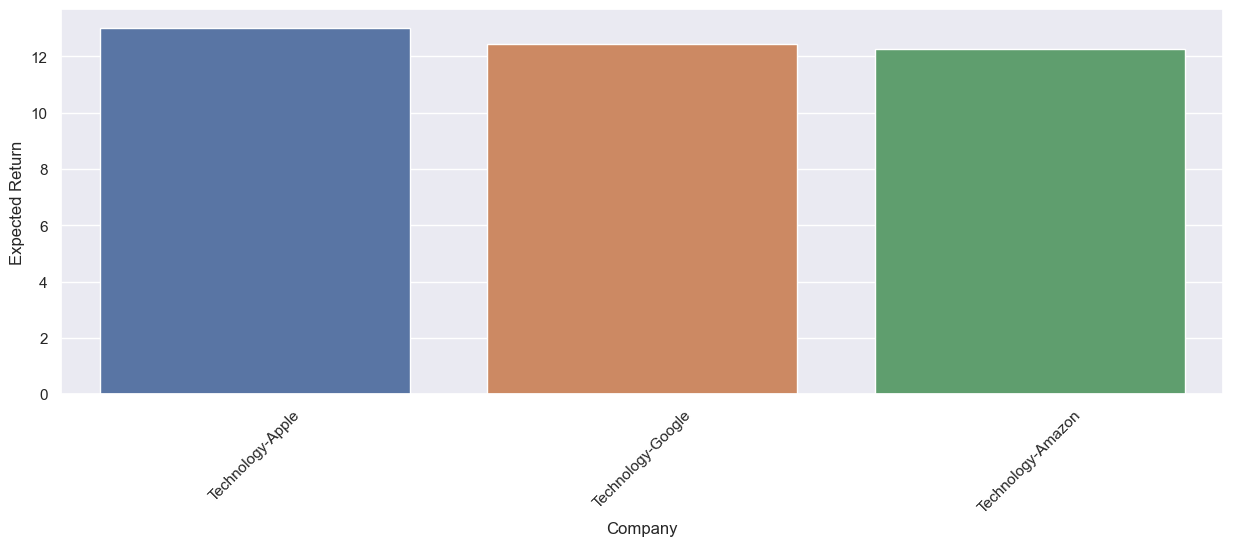

In [112]:

plt.figure(figsize=[15,5])
sns.barplot(data=portfolio.sort_values("Expected Return", ascending=False),x="index",y="Expected Return")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()



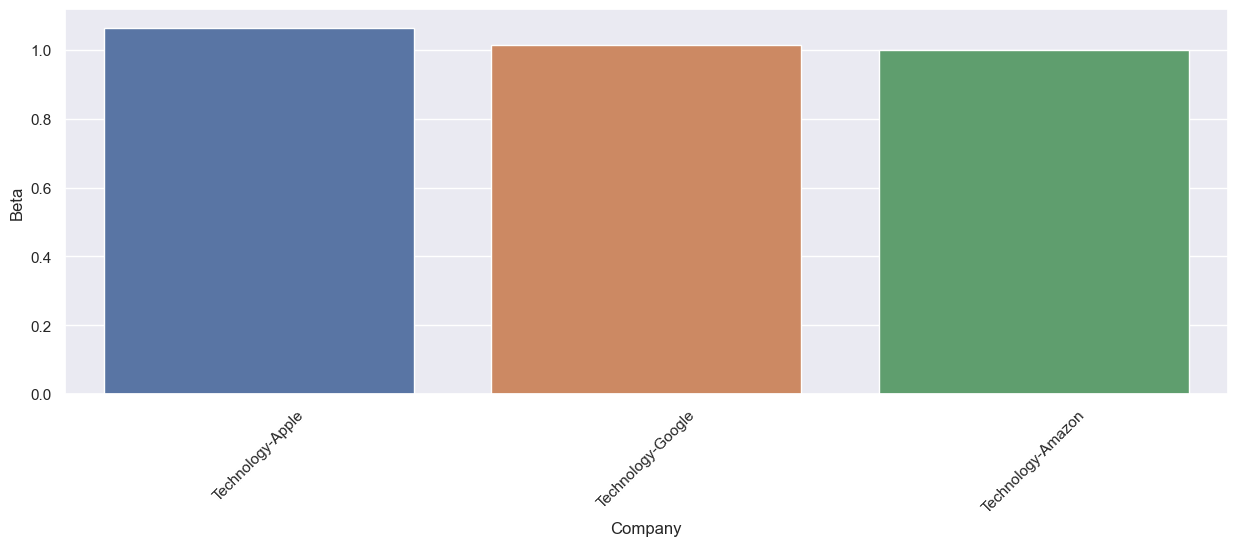

In [113]:
plt.figure(figsize=[15,5])
sns.barplot(data=portfolio.sort_values("Beta", ascending=False),x="index",y="Beta")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()

In [114]:
# Value of Portfolio in 10 years 
portfolio_val = portfolio["Stock Value"].sum()
print(portfolio_val)

6262566.67


In [115]:
# Calculate the return on investment for 10 years
roi = ((portfolio_val - investment)/investment).round(2)
roi

11.53

In [116]:
# Annualized Rate of return for the 10 years
period = 10
roi_annual=((1+roi)**(1/period)-1).round(2)
roi_annual

0.29

In [117]:
#portfolio risk
portfolio_risk = (portfolio["Annualized Risk"]*weight).sum().round(2)
print(portfolio_risk)

28.52



- The investment fund of 500,000 USD would have grown to 6.26 million USD in 10 years if invested equally in these 3 stocks.
- The portfolio's annualised return on investment is 29%
- Risk rate is 28% and for the index it is 17%

#### Stock Price Prediction and Predicting the Future Value of Portfolio
- Preparation
- Test for stationarity 
- seasonal decomposition
- Train -Test split
- Selection of Model 
- Find the future value of the chose stocks by the end of 3 years
- Build another portfolio and repeat step 1 to 4 above

#### Preparation

In [118]:
# Explore the prices dataframe
stock_prices.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

In [119]:
stock_prices=stock_prices.reset_index()

In [120]:
df=stock_prices.drop(['Date','Aviation-Alaska','Aviation-American', 'Aviation-Hawa', 'Finance-CS', 'Finance-Deutsche',
                             'Finance-Goldman', 'Healthcare-Bausch', 'Healthcare-J&J','Healthcare-Merck', 'Index-SP500'],axis=1)

In [121]:
df.head()

Technology-Amazon  Technology-Apple  Technology-Google
0         153.710007         10.090000         261.828613
1         155.389999          9.951428         260.199707
2         160.869995         10.319285         268.110046
3         155.399994         10.328215         266.177307
4         156.270004         10.329286         264.015411

In [122]:
df.rename(columns = {'Technology-Amazon':'Amazon', 'Technology-Apple':'Apple', 'Technology-Google':'Google'}, inplace = True)
df.head()

Amazon      Apple      Google
0  153.710007  10.090000  261.828613
1  155.389999   9.951428  260.199707
2  160.869995  10.319285  268.110046
3  155.399994  10.328215  266.177307
4  156.270004  10.329286  264.015411

#### Test for Stationarity

In [123]:
# Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller

for col in df.columns:
    adf_test = adfuller(df[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Amazon
ADF Statistic: 2.739671
Critical Values @ 0.05: -2.86
p-value: 0.999088

Series is Non-Stationary

--------------------------------------

Apple
ADF Statistic: 2.709617
Critical Values @ 0.05: -2.86
p-value: 0.999087

Series is Non-Stationary

--------------------------------------

Google
ADF Statistic: 0.188378
Critical Values @ 0.05: -2.86
p-value: 0.971602

Series is Non-Stationary

--------------------------------------



In [124]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in df.columns:
    kpss_test = kpss(df[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Amazon
KPSS Statistic: 6.956628
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Apple
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Google
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------




- Both the tests confirm that the price data of all stocks are non-stationary.

## Time Series Decompostion

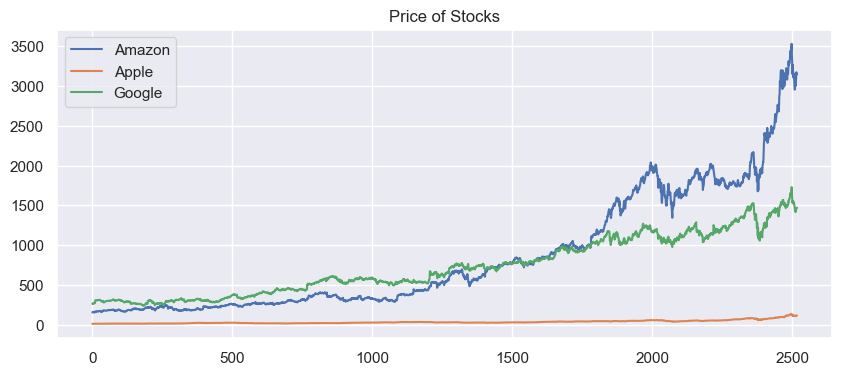

In [125]:
# Plotting the actual prices of all stocks
df.plot(figsize = (10,4))
plt.title("Price of Stocks")
plt.show()


- The stocks of Amazon and Google shows a clear upward trend while Apple & J&J appears to be stable.

- In the next step, in order to test the contribution of trend, seasonality and systemic risks towards the non-stationarity, time-series decomposition is done.

#### Additive seasonal decomposition

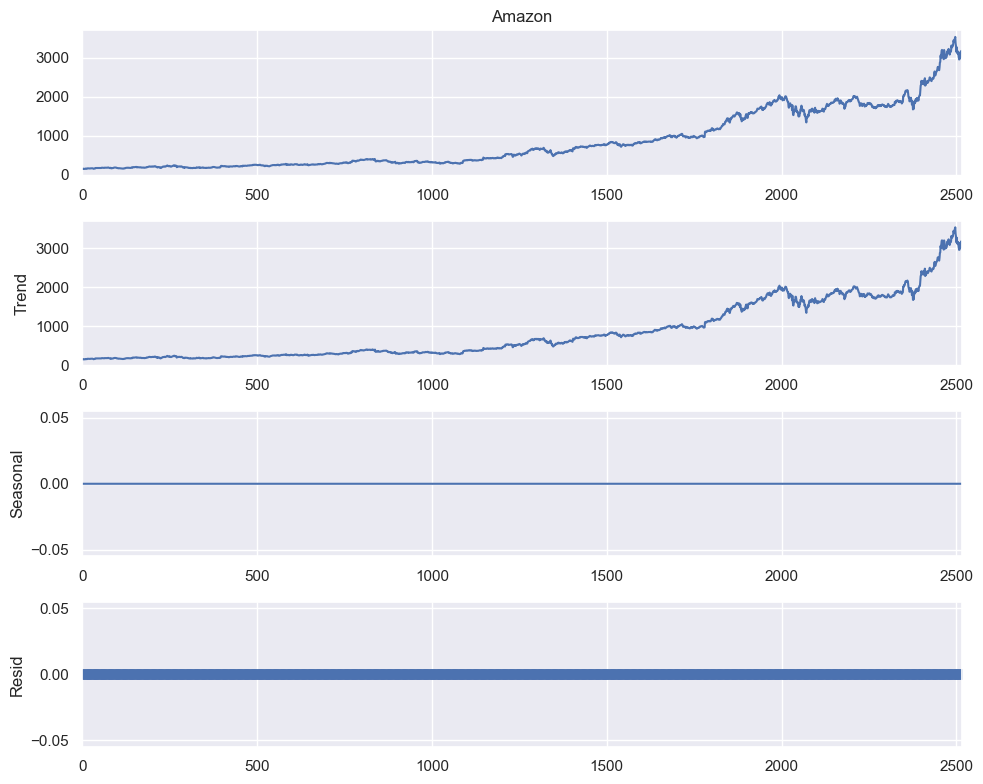

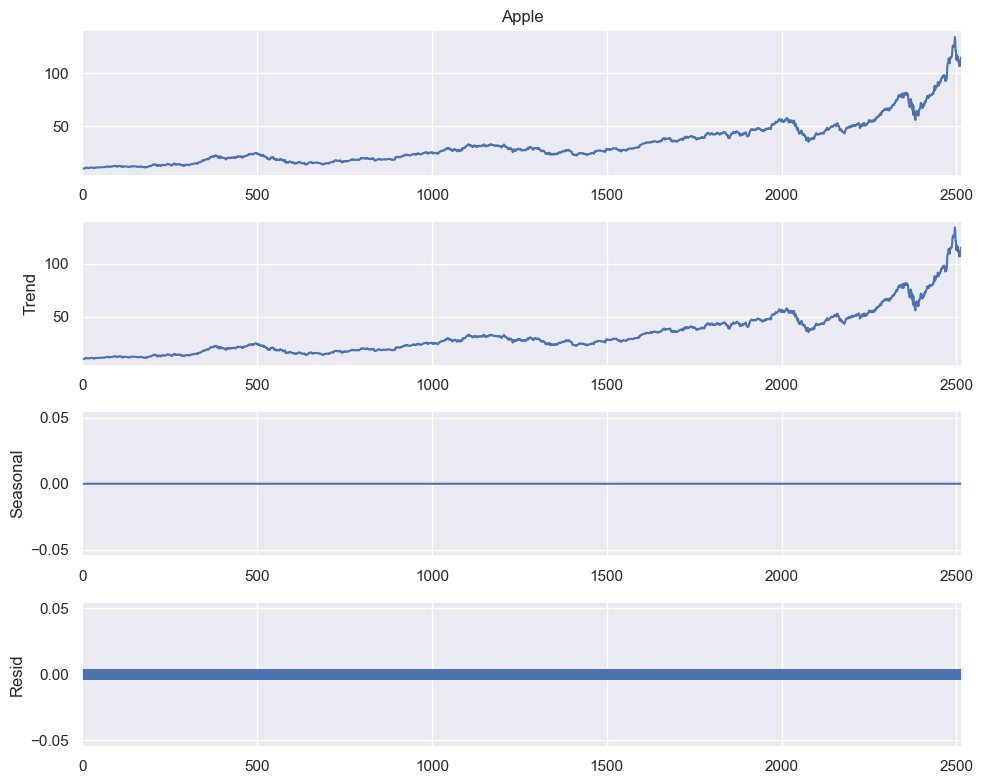

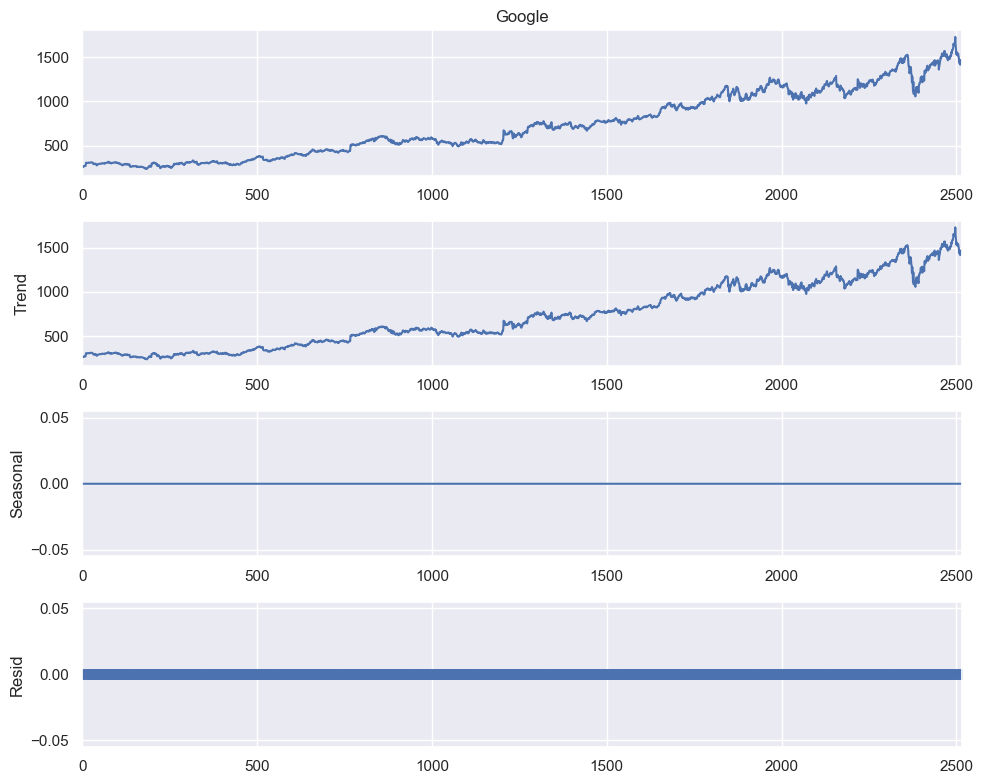

In [126]:
# Additive seasonal decomposition for all stocks
for col in df.columns:
    rcParams['figure.figsize'] = 10, 8
    add_result = seasonal_decompose(df[col], model='additive', period =1) # additive seasonal index
    fig = add_result.plot()
    plt.show()

#### Multiplicative seasonal decomposition

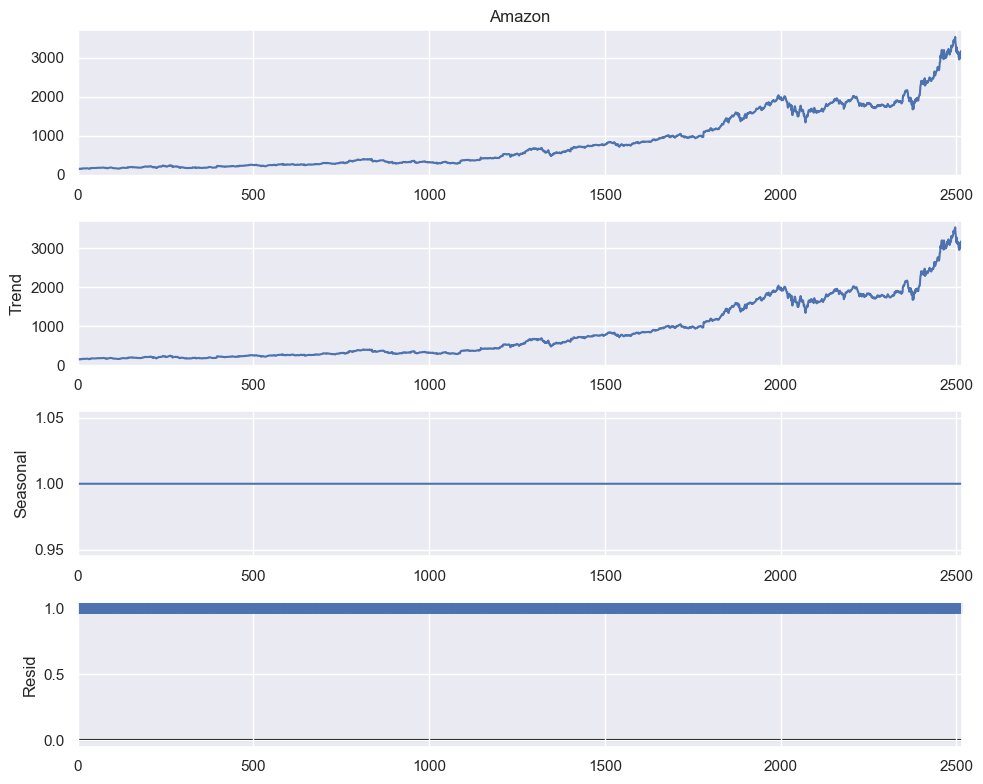

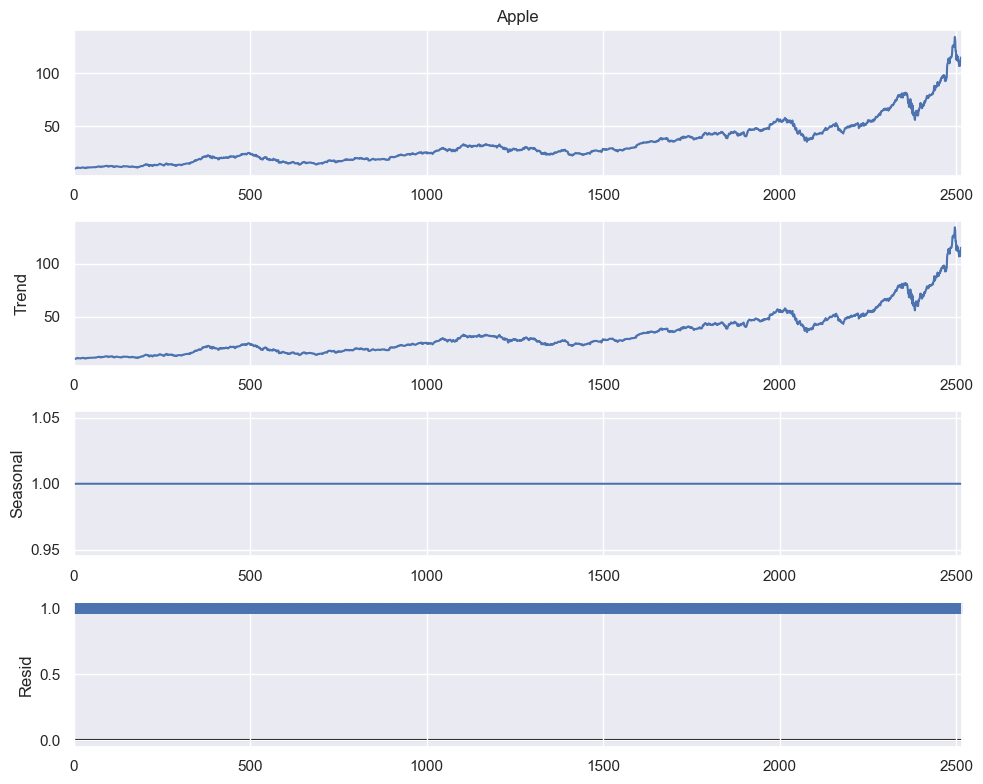

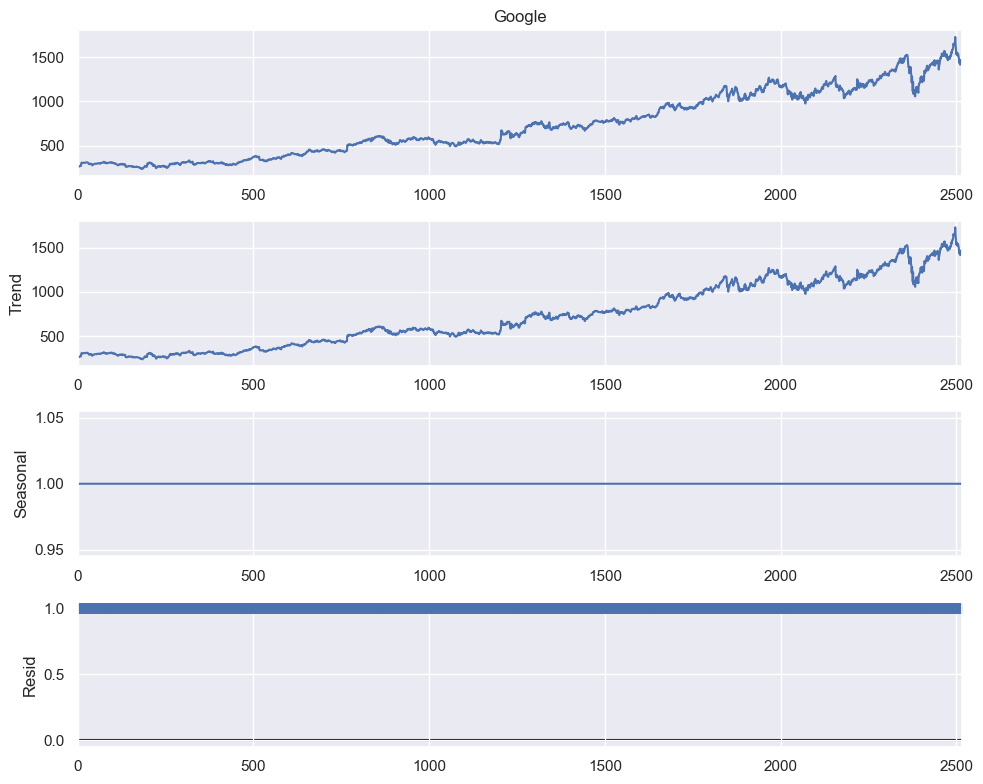

In [127]:
# Multiplicative seasonal decomposition for J&J
for col in df.columns:
    mul_result = seasonal_decompose(df[col], model='multiplicative', period=1) # multiplicative seasonal index
    fig = mul_result.plot()
    plt.show()



The graphs show that there is a clear uptrend in the data; however, seasonality and systemic effect of residues are nil.
Hence, it can be concluded that the non stationarity in the data is due to the effect of trend.
Hence exponential smoothing and Auto Regression models can be explored.
Also, the portfolio contains multiple stocks to be predicted Vector Auto Regression model can also be evaluated for its ability to forecast future prices.
RMSE and MAPE values would be used for evaluating the model. The model that shows lowest RMSE and MAPE would be selected for forecasting.

## Train-Test Split

In [128]:
# Length of the dataframe
len(df)

2517

In [129]:
# Keeping 70% values as train
train_len = int(df.shape[0]*0.7)
test_len = int(df.shape[0]) - int(df.shape[0]*0.7)

# Train data
train = df[:train_len] 

# Test data
test = df[train_len:]

1. The dataset of Amazon stocks alone is taken as an example for testing the effectiveness of the models in subsequent parts

## Build and evaluate the ML Models for Time series forecast
     - Since the smoothing methods are quiet useful for datasets with trend and seasonality, these models are evaluated.
     - The models include: Simple exponential smoothing, Holt's exponential smoothing, Holt-winter's additive forecast method, Holt-Winter's multiplicative forcast method.
   - Since ARIMA set of models will be tested
   - Since the dataset contains prices of multiple stocks, VAR method will be built and evaluated.

## Holt's method with trend

In [130]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model for Amazon
hws_model = ExponentialSmoothing(np.asarray(train['Amazon']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
hws_model_fit = hws_model.fit(optimized=True)
print(hws_model_fit.params)
holt = test.copy()
holt['holt_forecast'] = hws_model_fit.forecast(len(test))

{'smoothing_level': 0.9968944520990369, 'smoothing_trend': 6.164572860979789e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 153.81515228018876, 'initial_trend': 0.43268089317057257, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


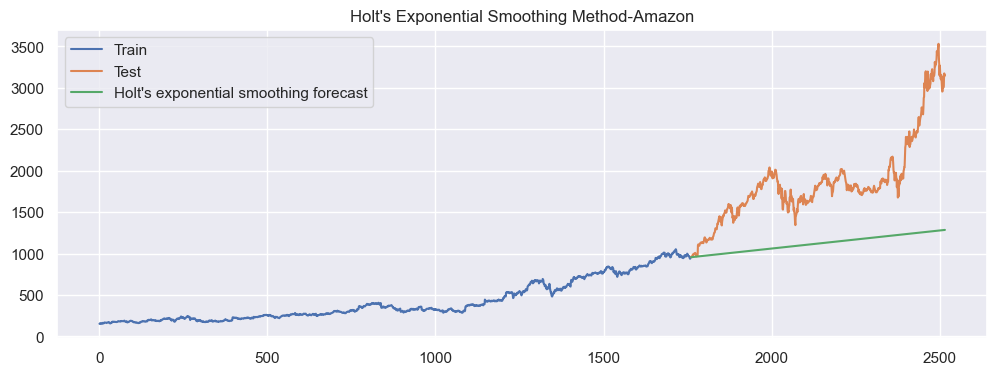

In [131]:
# Plot train, test and forecast

# Plot train, test and forecast for Amazon
plt.figure(figsize=(12,4))
plt.plot( train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method-Amazon')
plt.show()

In [132]:
# Calculate RSME and MAPE

from sklearn.metrics import mean_squared_error

In [133]:
# RMSE & MAPE for Holt's exponential smoothing method - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'], holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-holt['holt_forecast'])/test['Amazon'])*100,2)

results_Amazon = pd.DataFrame({'Method':['Holt\'s Exp Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  857.35  36.82

## Auto Regressive methods
- Under ARIMA set of models, Auto Regression (AR), Moving Average (MA), Auto Regressive Moving Average (ARMA), Auto Regressive Integrated Moving Average (ARIMA) and Seasonal ARIMA (SARIMA) methods are to be compared.
- As observed, the data is non stationary. Before testing the data in ARIMA models, it has to be made stationary.
- This is done by Box-cox transformation followed by differencing.
- Stationarity is verified after transformation and differencing.
- The stationary data is fit in the model to evaluate its effectiveness.

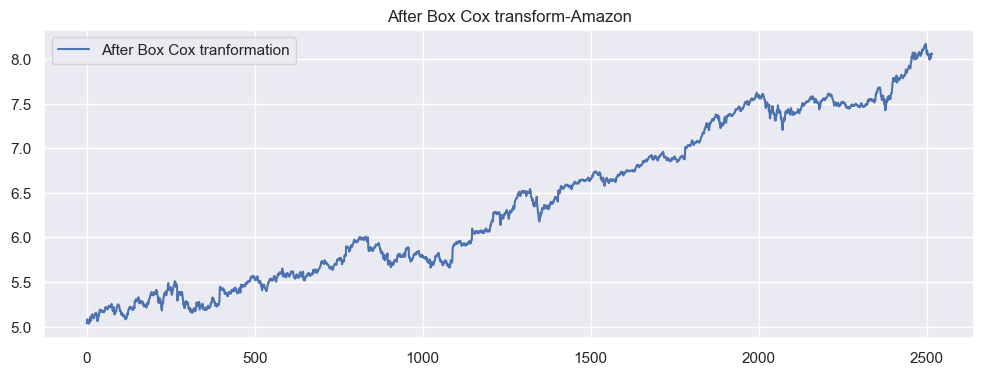

In [134]:
# Box Cox transformation to make variance constant

from scipy.stats import boxcox


df_boxcox_Amazon = pd.Series(boxcox(df['Amazon'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(df_boxcox_Amazon, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform-Amazon')
plt.show()

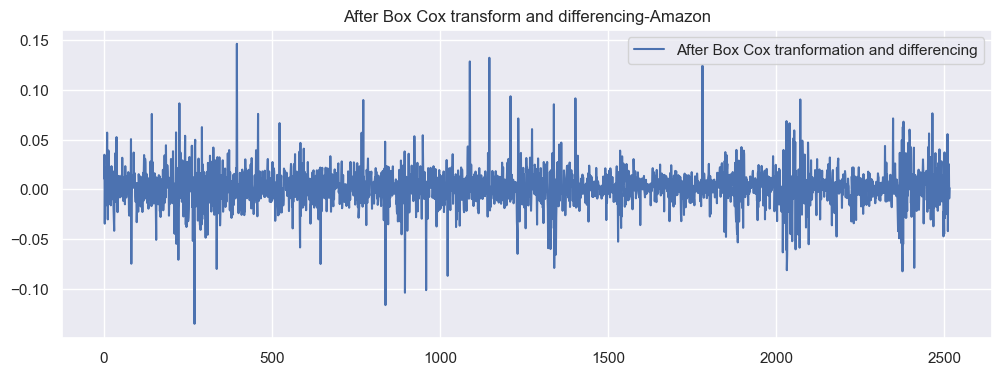

In [135]:
# Differencing to remove trend

df_boxcox_diff_Amazon = pd.Series(df_boxcox_Amazon - df_boxcox_Amazon.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff_Amazon, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing-Amazon')
plt.show()


- After the boxcox transformation and first order differencing the trend is removed and the data is distributed around the mean.

 #### Check for stationarity after tranformation and differencing

In [136]:
# Checking for null values after differencing
df_boxcox_diff_Amazon.head(3)

0         NaN
1    0.010870
2    0.034658
Name: Amazon, dtype: float64

In [137]:
df_boxcox_diff_Amazon.dropna(inplace=True)

In [138]:
# Check for null values again
df_boxcox_diff_Amazon.head(3)

1    0.010870
2    0.034658
3   -0.034594
Name: Amazon, dtype: float64

In [139]:
# Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(df_boxcox_diff_Amazon)

print('Amazon')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

Amazon
ADF Statistic: -51.444151
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [140]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

kpss_test = kpss(df_boxcox_diff_Amazon)

print('Amazon')
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

Amazon
KPSS Statistic: 0.062235
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [141]:
# Test-Train Split of differentiated data
train_df_boxcox_Amazon = df_boxcox_Amazon[:train_len]
test_df_boxcox_Amazon = df_boxcox_Amazon[train_len:]
train_df_boxcox_diff_Amazon = df_boxcox_diff_Amazon[:train_len-1]
test_df_boxcox_diff_Amazon = df_boxcox_diff_Amazon[train_len-1:]

## Auto Regression (AR) Method

In [142]:
# Importing ARIMA library and fitting the model
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 0, 0)) 
ar_model_fit = ar_model.fit()
print(ar_model_fit.params)

const     0.001037
ar.L1    -0.001730
sigma2    0.000378
dtype: float64


In [143]:
# Recovering original time series
ar = df_boxcox_diff_Amazon.copy()
ar['ar_forecast_boxcox_diff'] = ar_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox_diff'].cumsum()
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox'].add(df_boxcox_Amazon[0])
ar['ar_forecast'] = np.exp(ar['ar_forecast_boxcox'])

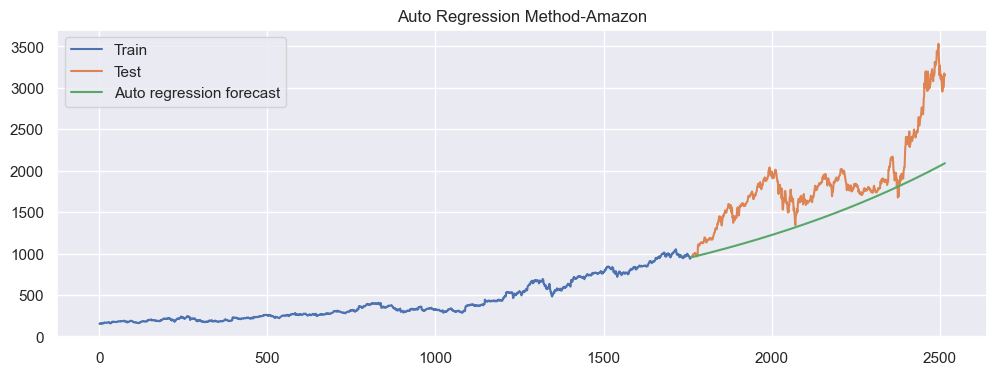

In [144]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method-Amazon')
plt.show()

In [145]:
# Calculating RMSE and MAPE for 'Autoregressive (AR) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ar['ar_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['AR'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  857.35  36.82
0                    AR  505.13  20.85

 ## Moving average method (MA)

In [146]:
# Creating and fitting the model
ma_model = ARIMA(train_df_boxcox_diff_Amazon, order=(0, 0, 1)) 
ma_model_fit = ma_model.fit()
print(ma_model_fit.params)

const     0.001036
ma.L1    -0.001363
sigma2    0.000378
dtype: float64


In [147]:
# Recovering original time series
ma = df_boxcox_diff_Amazon.copy()
ma['ma_forecast_boxcox_diff'] = ma_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox_diff'].cumsum()
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox'].add(df_boxcox_Amazon[0])
ma['ma_forecast'] = np.exp(ma['ma_forecast_boxcox'])

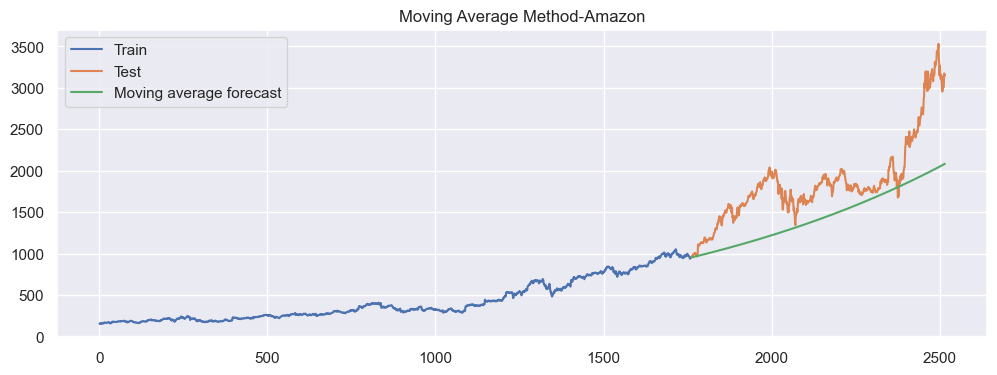

In [148]:
# Plotting train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method-Amazon')
plt.show()

In [149]:
# Calculating RMSE and MAPE for 'Moving Average (MA) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ma['ma_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['MA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  857.35  36.82
0                    AR  505.13  20.85
0                    MA  508.88  21.07

## Auto regression moving average method (ARMA)

In [150]:
# Creating and fitting the model
arma_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 0, 1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.params)

const     1.035891e-03
ar.L1    -3.656750e-07
ma.L1    -3.677357e-07
sigma2    3.775763e-04
dtype: float64


In [151]:
# Recovering original time series

arma = df_boxcox_diff_Amazon.copy()
arma['arma_forecast_boxcox_diff'] = arma_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox_diff'].cumsum()
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox'].add(df_boxcox_Amazon[0])
arma['arma_forecast'] = np.exp(arma['arma_forecast_boxcox'])

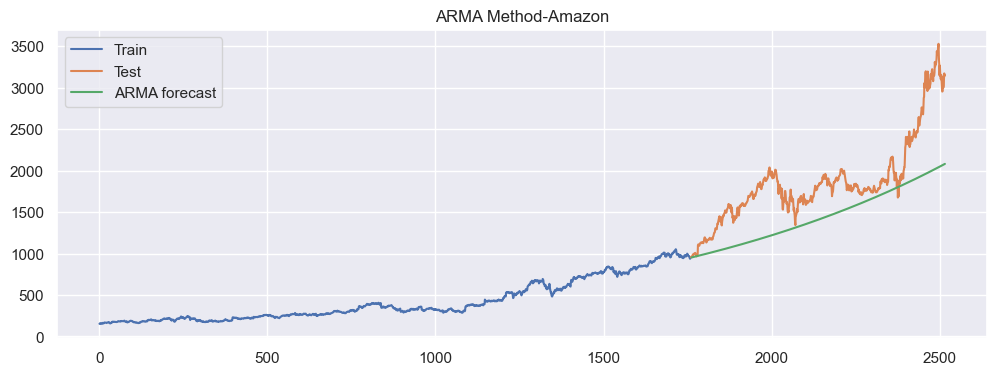

In [152]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( df['Amazon'][:train_len-1], label='Train')
plt.plot(df['Amazon'][train_len-1:], label='Test')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method-Amazon')
plt.show()

In [153]:
# Calculating RMSE and MAPE 'Autoregressive moving average (ARMA) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'], arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-arma['arma_forecast'][train_len-1:])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  857.35  36.82
0                    AR  505.13  20.85
0                    MA  508.88  21.07
0                  ARMA  508.85  21.06

## Auto regressive integrated moving average (ARIMA)

In [154]:
# Creating and fitting the model
arima_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.params)

ar.L1    -0.001202
ma.L1    -0.999826
sigma2    0.000378
dtype: float64


In [155]:
# Recovering original time series forecast
arima = df_boxcox_diff_Amazon.copy()
arima['arima_forecast_boxcox_diff'] = arima_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox_diff'].cumsum()
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox'].add(df_boxcox_Amazon[0])
arima['arima_forecast'] = np.exp(arima['arima_forecast_boxcox'])

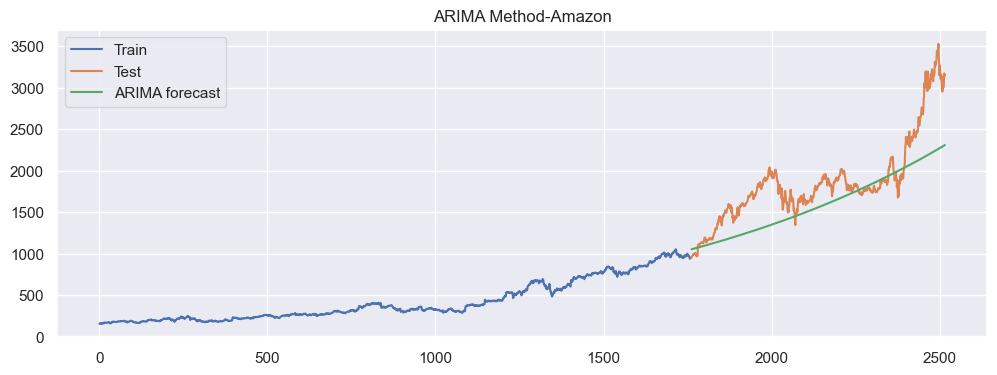

In [156]:
# Plotting train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( df['Amazon'][:train_len-1], label='Train')
plt.plot(df['Amazon'][train_len-1:], label='Test')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method-Amazon')
plt.show()

In [157]:
# Calculating RMSE and MAPE for ARIMA- Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-arima['arima_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  857.35  36.82
0                    AR  505.13  20.85
0                    MA  508.88  21.07
0                  ARMA  508.85  21.06
0                 ARIMA  385.23  14.36

## Seasonal ARIMA

In [158]:
# Importing SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_df_boxcox_diff_Amazon, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.params)

ar.L1      -0.000642
ma.L1      -0.999311
ar.S.L12   -0.050044
ma.S.L12   -0.999703
sigma2      0.000376
dtype: float64


In [159]:
# Recovering original time series forecast

sarima = df_boxcox_diff_Amazon.copy()
sarima['sarima_forecast_boxcox'] = sarima_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
sarima['sarima_forecast'] = np.exp(sarima['sarima_forecast_boxcox'])

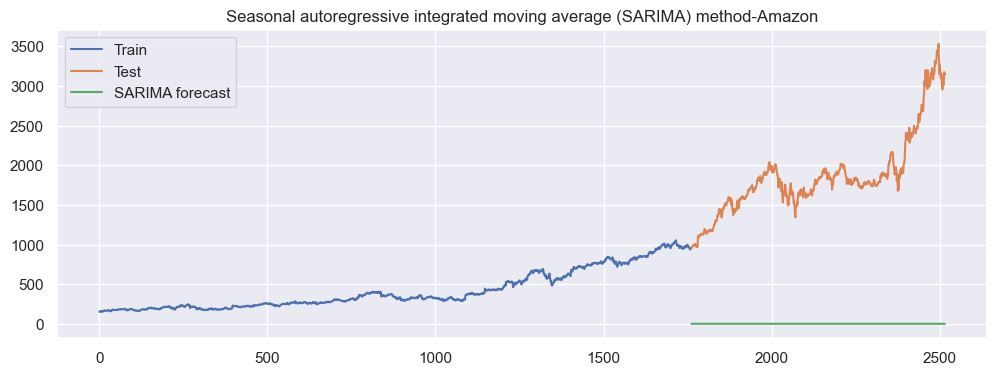

In [160]:
# Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method-Amazon')
plt.show()

In [161]:
# Calculating RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-sarima['sarima_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method     RMSE   MAPE
0  Holt's Exp Smoothing   857.35  36.82
0                    AR   505.13  20.85
0                    MA   508.88  21.07
0                  ARMA   508.85  21.06
0                 ARIMA   385.23  14.36
0                SARIMA  1929.34  99.94

#### Plotting all the result of all the models

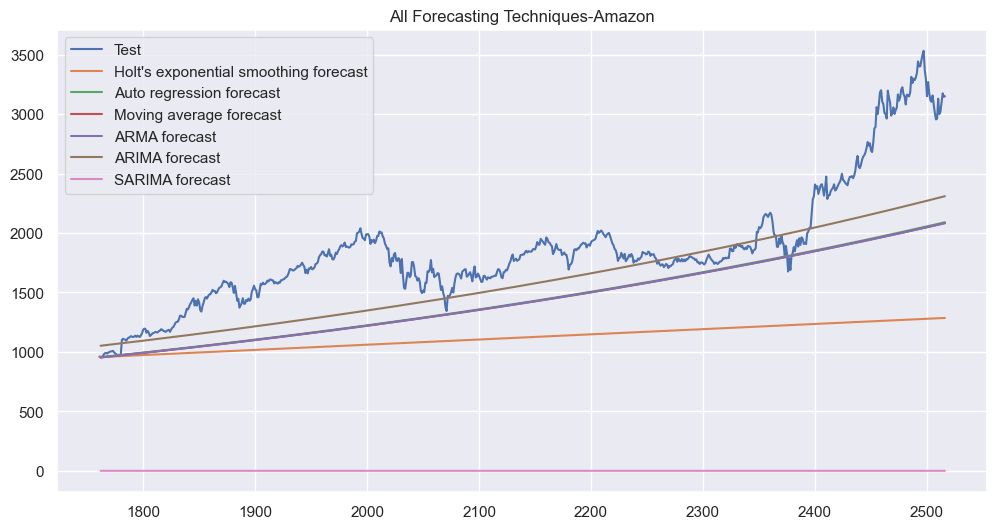

In [162]:
# Plotting and showing comparative forecasts of all smoothing techniques
plt.figure(figsize=(12,6))
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')


plt.legend(loc='best')
plt.title('All Forecasting Techniques-Amazon')
plt.show()


- When comparing the RMSE and MAPE resutlts of all the ML models, SARIMA gives lowest RMSE and MAPE values and the predicted values fit perfectly on the test data set However, the model completely overfits on the test data.
- Before deciding whether to select SARIMA or not, Vector Auto Regression can also be evaluated.

## Plotting the results of RMSE and MAPE

In [168]:
results_Amazon_final=results_Amazon.set_index('Method')

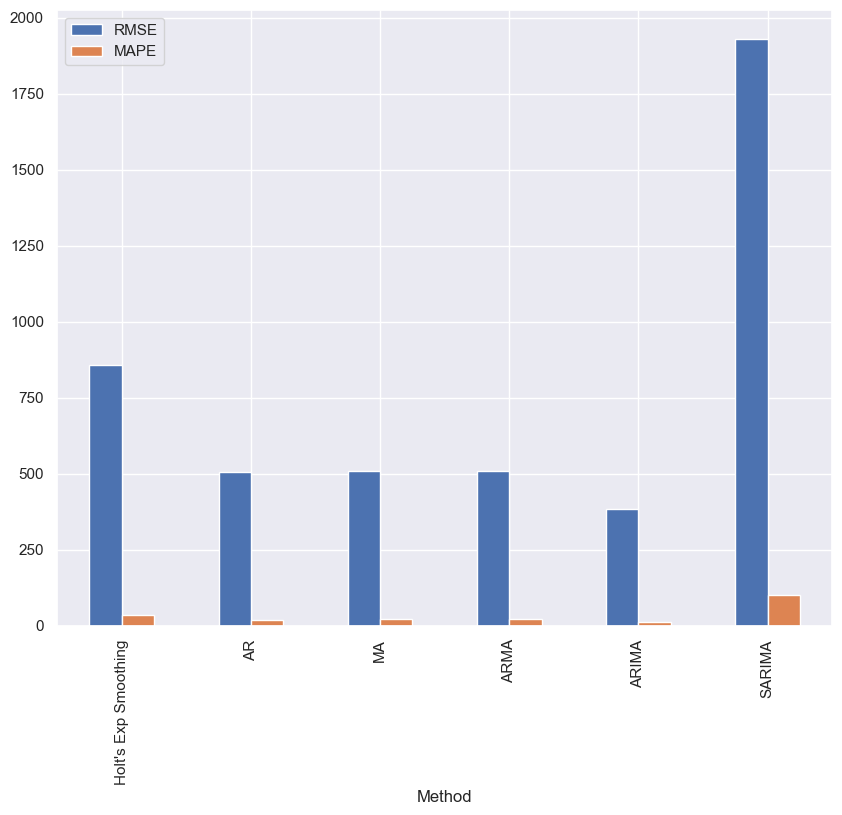

In [169]:
results_Amazon_final.plot.bar()
plt.show()